In [26]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [27]:
rb_df = pd.read_csv('Combined_RB.csv') #Reading in Combined Positional data
metric = 'Current_PFF_x' #Using Average Breakaway Yards to Predict

In [28]:
print(rb_df.columns)

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Team', 'Year', 'Position',
       'Value_cap_space', 'Value_draft_data', 'Previous_AV', 'Current_AV',
       'Previous_PFF', 'Current_PFF_x', 'Total DVOA', 'win-loss-pct',
       'Net EPA', 'Unnamed: 0_y', 'weighted_avg_attempts',
       'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts',
       'weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards',
       'weighted_avg_declined_penalties', 'weighted_avg_designed_yards',
       'weighted_avg_drops', 'weighted_avg_elu_recv_mtf',
       'weighted_avg_elu_rush_mtf', 'weighted_avg_elu_yco',
       'weighted_avg_elusive_rating', 'weighted_avg_explosive',
       'weighted_avg_first_downs', 'weighted_avg_franchise_id',
       'weighted_avg_fumbles', 'weighted_avg_gap_attempts',
       'weighted_avg_grades_hands_fumble', 'Current_PFF_y',
       'weighted_avg_grades_offense_penalty', 'weighted_avg_grades_pass',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_rout

In [29]:
drop_col = ['Unnamed: 0']
rb_df = rb_df.drop(columns=drop_col)

In [30]:
rb_df.head(20)

,Unnamed: 0_x,Team,Year,Position,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF_x,...,Previous_scrambles,Previous_targets,Previous_total_touches,Previous_touchdowns,Previous_yards,Previous_yards_after_contact,Previous_yco_attempt,Previous_ypa,Previous_yprr,Previous_zone_attempts
0,32,Buccaneers,2019,HB,2.247609,126.419891,7.0,13.0,64.767308,65.581604,...,0.000,26.939189,211.226351,4.141892,704.385135,507.327703,2.547365,3.526689,0.467399,103.229730
1,33,Packers,2019,HB,1.163656,31.352719,10.0,18.0,72.643895,81.600456,...,0.000,31.600000,144.843636,5.418182,564.112727,334.698182,2.771527,4.706182,0.891600,77.625455
2,34,Giants,2019,HB,4.404888,578.472330,17.0,12.0,80.499291,69.028045,...,0.000,96.933962,299.443396,9.188679,1101.273585,734.207547,3.138302,4.717925,1.441792,149.160377
3,35,Commanders,2019,HB,3.475027,102.500497,11.0,13.0,71.444032,67.490256,...,0.000,27.679612,232.226537,5.686084,872.203883,628.378641,2.902330,4.140777,1.269871,91.779935
4,36,Patriots,2019,HB,6.556854,202.527583,20.0,17.0,71.641226,70.494015,...,0.000,39.258242,181.936813,4.736264,673.711538,376.887363,2.363022,4.331868,1.284038,49.873626
5,37,Vikings,2019,HB,1.987248,160.892394,12.0,25.0,72.750276,76.719881,...,0.000,33.941980,156.709898,3.774744,557.928328,377.389078,2.936212,4.315700,0.914369,82.836177
6,38,Broncos,2019,HB,1.222104,63.971498,14.0,14.0,73.200903,69.022851,...,0.000,35.252809,181.887640,6.775281,767.011236,406.938202,2.757472,4.888764,1.040393,75.359551
7,39,Falcons,2019,HB,4.622742,44.313414,13.0,13.0,65.960274,59.997733,...,0.000,31.726667,148.433333,3.426667,554.223333,349.920000,2.785300,4.561333,0.847900,85.510000
8,40,Bengals,2019,HB,3.900106,133.421060,16.0,11.0,74.236504,70.374495,...,0.000,49.470588,232.699346,6.718954,943.294118,530.209150,2.680392,4.661438,1.070850,127.313725
9,41,Colts,2019,HB,1.514346,45.016446,16.0,18.0,68.290828,70.317484,...,0.000,35.177650,167.667622,5.687679,641.498567,388.372493,2.716791,4.544413,0.784097,52.326648


In [31]:
team_data = rb_df.groupby('Team')
print(rb_df.head(32)) #check all the teams are have their rb values grouped

    Unnamed: 0_x        Team  Year Position  Value_cap_space  \
0             32  Buccaneers  2019       HB         2.247609   
1             33     Packers  2019       HB         1.163656   
2             34      Giants  2019       HB         4.404888   
3             35  Commanders  2019       HB         3.475027   
4             36    Patriots  2019       HB         6.556854   
5             37     Vikings  2019       HB         1.987248   
6             38     Broncos  2019       HB         1.222104   
7             39     Falcons  2019       HB         4.622742   
8             40     Bengals  2019       HB         3.900106   
9             41       Colts  2019       HB         1.514346   
10            42    Steelers  2019       HB         1.493092   
11            43     Jaguars  2019       HB         4.505845   
12            44       Bears  2019       HB         0.951116   
13            45    Seahawks  2019       HB         0.329437   
14            46    Panthers  2019      

In [32]:
sequences = []
targets = []

#Iterating over team and their data
for team, group in team_data:
    if len(group) >= 4:
        print(f"Processing team: {team}, data length(years): {len(group)}")
        
        #Iterate through data to make sequences for every 3 years
        for i in range(len(group) - 3):
            sequence = group.iloc[i:i+3][['Value_cap_space', 'Previous_PFF', 'weighted_avg_avoided_tackles', 'Current_PFF_x','weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards']]
            #target the proceeding year's Current PFF to compare
            target = group.iloc[i+3]['Current_PFF_x']
            sequences.append(sequence.values) #Add sequence values to sequence list
            targets.append(target) #Add target values to target list
            
#Convert lists to numpy arrays
s = np.array(sequences)
t = np.array(targets)

print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {s.shape}, y shape: {t.shape}")

Processing team: 49ers, data length(years): 4
Processing team: Bears, data length(years): 4
Processing team: Bengals, data length(years): 4
Processing team: Bills, data length(years): 4
Processing team: Broncos, data length(years): 4
Processing team: Browns, data length(years): 4
Processing team: Buccaneers, data length(years): 4
Processing team: Cardinals, data length(years): 4
Processing team: Chargers, data length(years): 4
Processing team: Chiefs, data length(years): 4
Processing team: Colts, data length(years): 4
Processing team: Commanders, data length(years): 4
Processing team: Cowboys, data length(years): 4
Processing team: Dolphins, data length(years): 4
Processing team: Eagles, data length(years): 4
Processing team: Falcons, data length(years): 4
Processing team: Giants, data length(years): 4
Processing team: Jaguars, data length(years): 4
Processing team: Jets, data length(years): 4
Processing team: Lions, data length(years): 4
Processing team: Packers, data length(years): 4

In [33]:

# Reshape X to (samples, timesteps, features)
S = s.reshape(s.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(S.shape)  # Should now be (samples, 3, features)
print(S)

(32, 3, 6)
[[[3.58129649e+00 6.69894484e+01 2.04386792e+01 7.27191268e+01
   3.76936321e+01 2.35856132e+02]
  [4.35923310e+00 7.27191268e+01 1.16226913e+01 7.11088300e+01
   2.73968338e+01 1.28382586e+02]
  [2.38356164e+00 7.11088300e+01 2.44914286e+01 6.99763682e+01
   1.96040000e+01 1.42154286e+02]]

 [[9.51115834e-01 6.92217484e+01 3.90129870e+01 6.44849515e+01
   1.36350649e+01 1.08448052e+02]
  [1.06962664e+00 6.44849515e+01 4.22694611e+01 7.79867612e+01
   1.98709581e+01 1.81500000e+02]
  [1.93972603e+00 7.79867612e+01 2.89539295e+01 7.23904977e+01
   1.93607046e+01 1.28070461e+02]]

 [[3.90010627e+00 7.42365039e+01 4.49546828e+01 7.03744949e+01
   2.82450151e+01 2.66610272e+02]
  [3.18365288e+00 7.03744949e+01 1.53313253e+01 6.66884615e+01
   1.72692771e+01 5.66566265e+01]
  [5.78630137e+00 6.66884615e+01 3.31715040e+01 7.57771552e+01
   2.13546174e+01 2.09569921e+02]]

 [[2.42295430e+00 6.35531707e+01 2.41982249e+01 6.45814249e+01
   3.00715976e+01 2.08834320e+02]
  [2.28557013

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer
inputs = Input(shape=(3, 6))  # 3 time steps, 6 features because I had less features than 8

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 5370.2393 - val_loss: 5041.6514
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5534.1333 - val_loss: 4955.1704
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5259.9995 - val_loss: 4861.3115
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5158.3599 - val_loss: 4758.2290
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4999.3433 - val_loss: 4647.1909


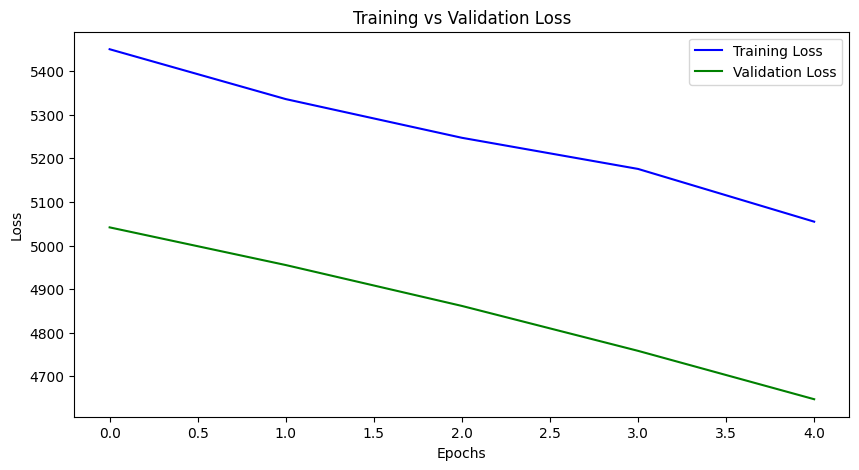

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


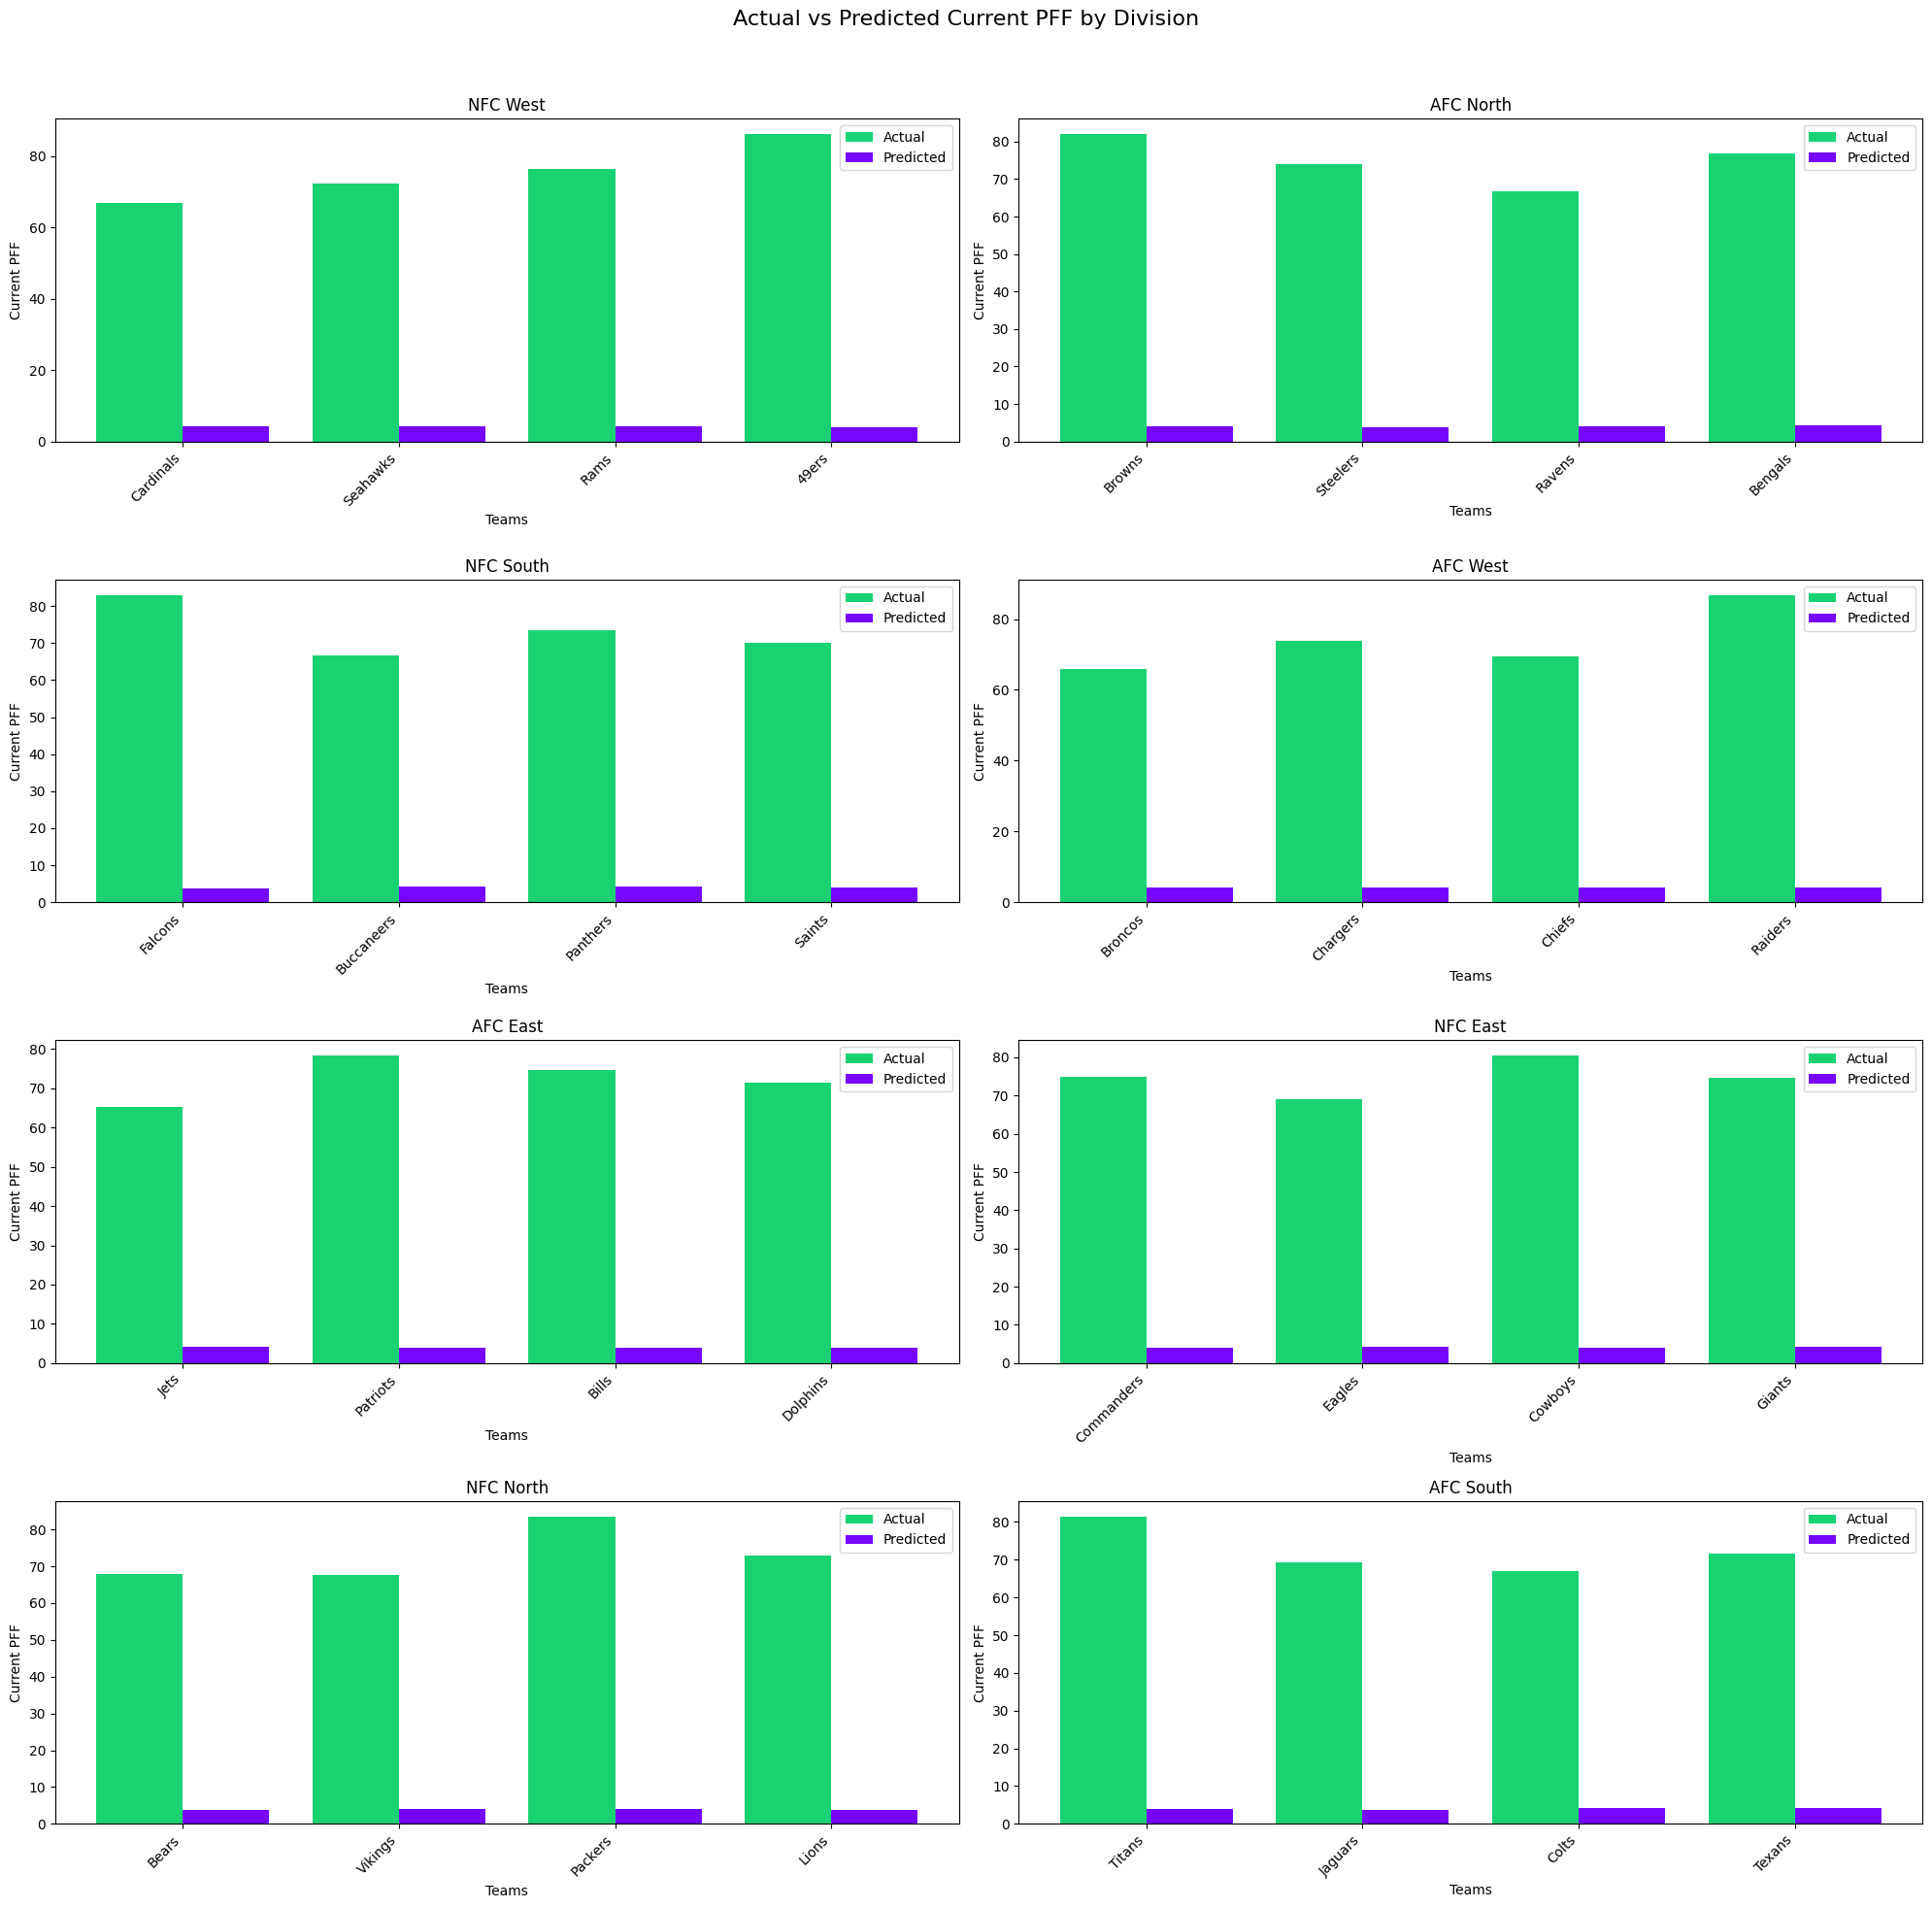

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4778.9985 - val_loss: 4524.4116
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4957.8628 - val_loss: 4382.1577
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4578.1025 - val_loss: 4214.0532
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4482.1182 - val_loss: 4013.4934
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4240.9966 - val_loss: 3789.9531
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4185.3730 - val_loss: 3539.3301
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3739.1611 - val_loss: 3263.6848
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3531.8457 - val_loss: 2952.9670
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3136.6865 - val_loss: 2602.6926
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2701.4229 - val_loss: 2220.3687


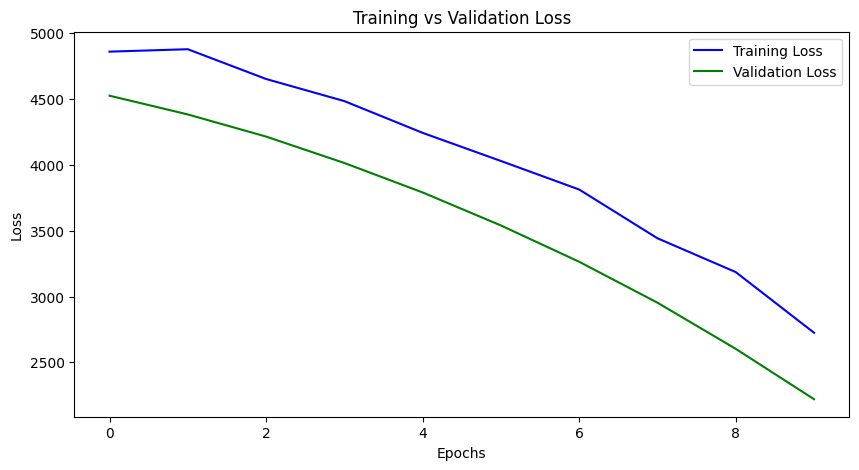

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


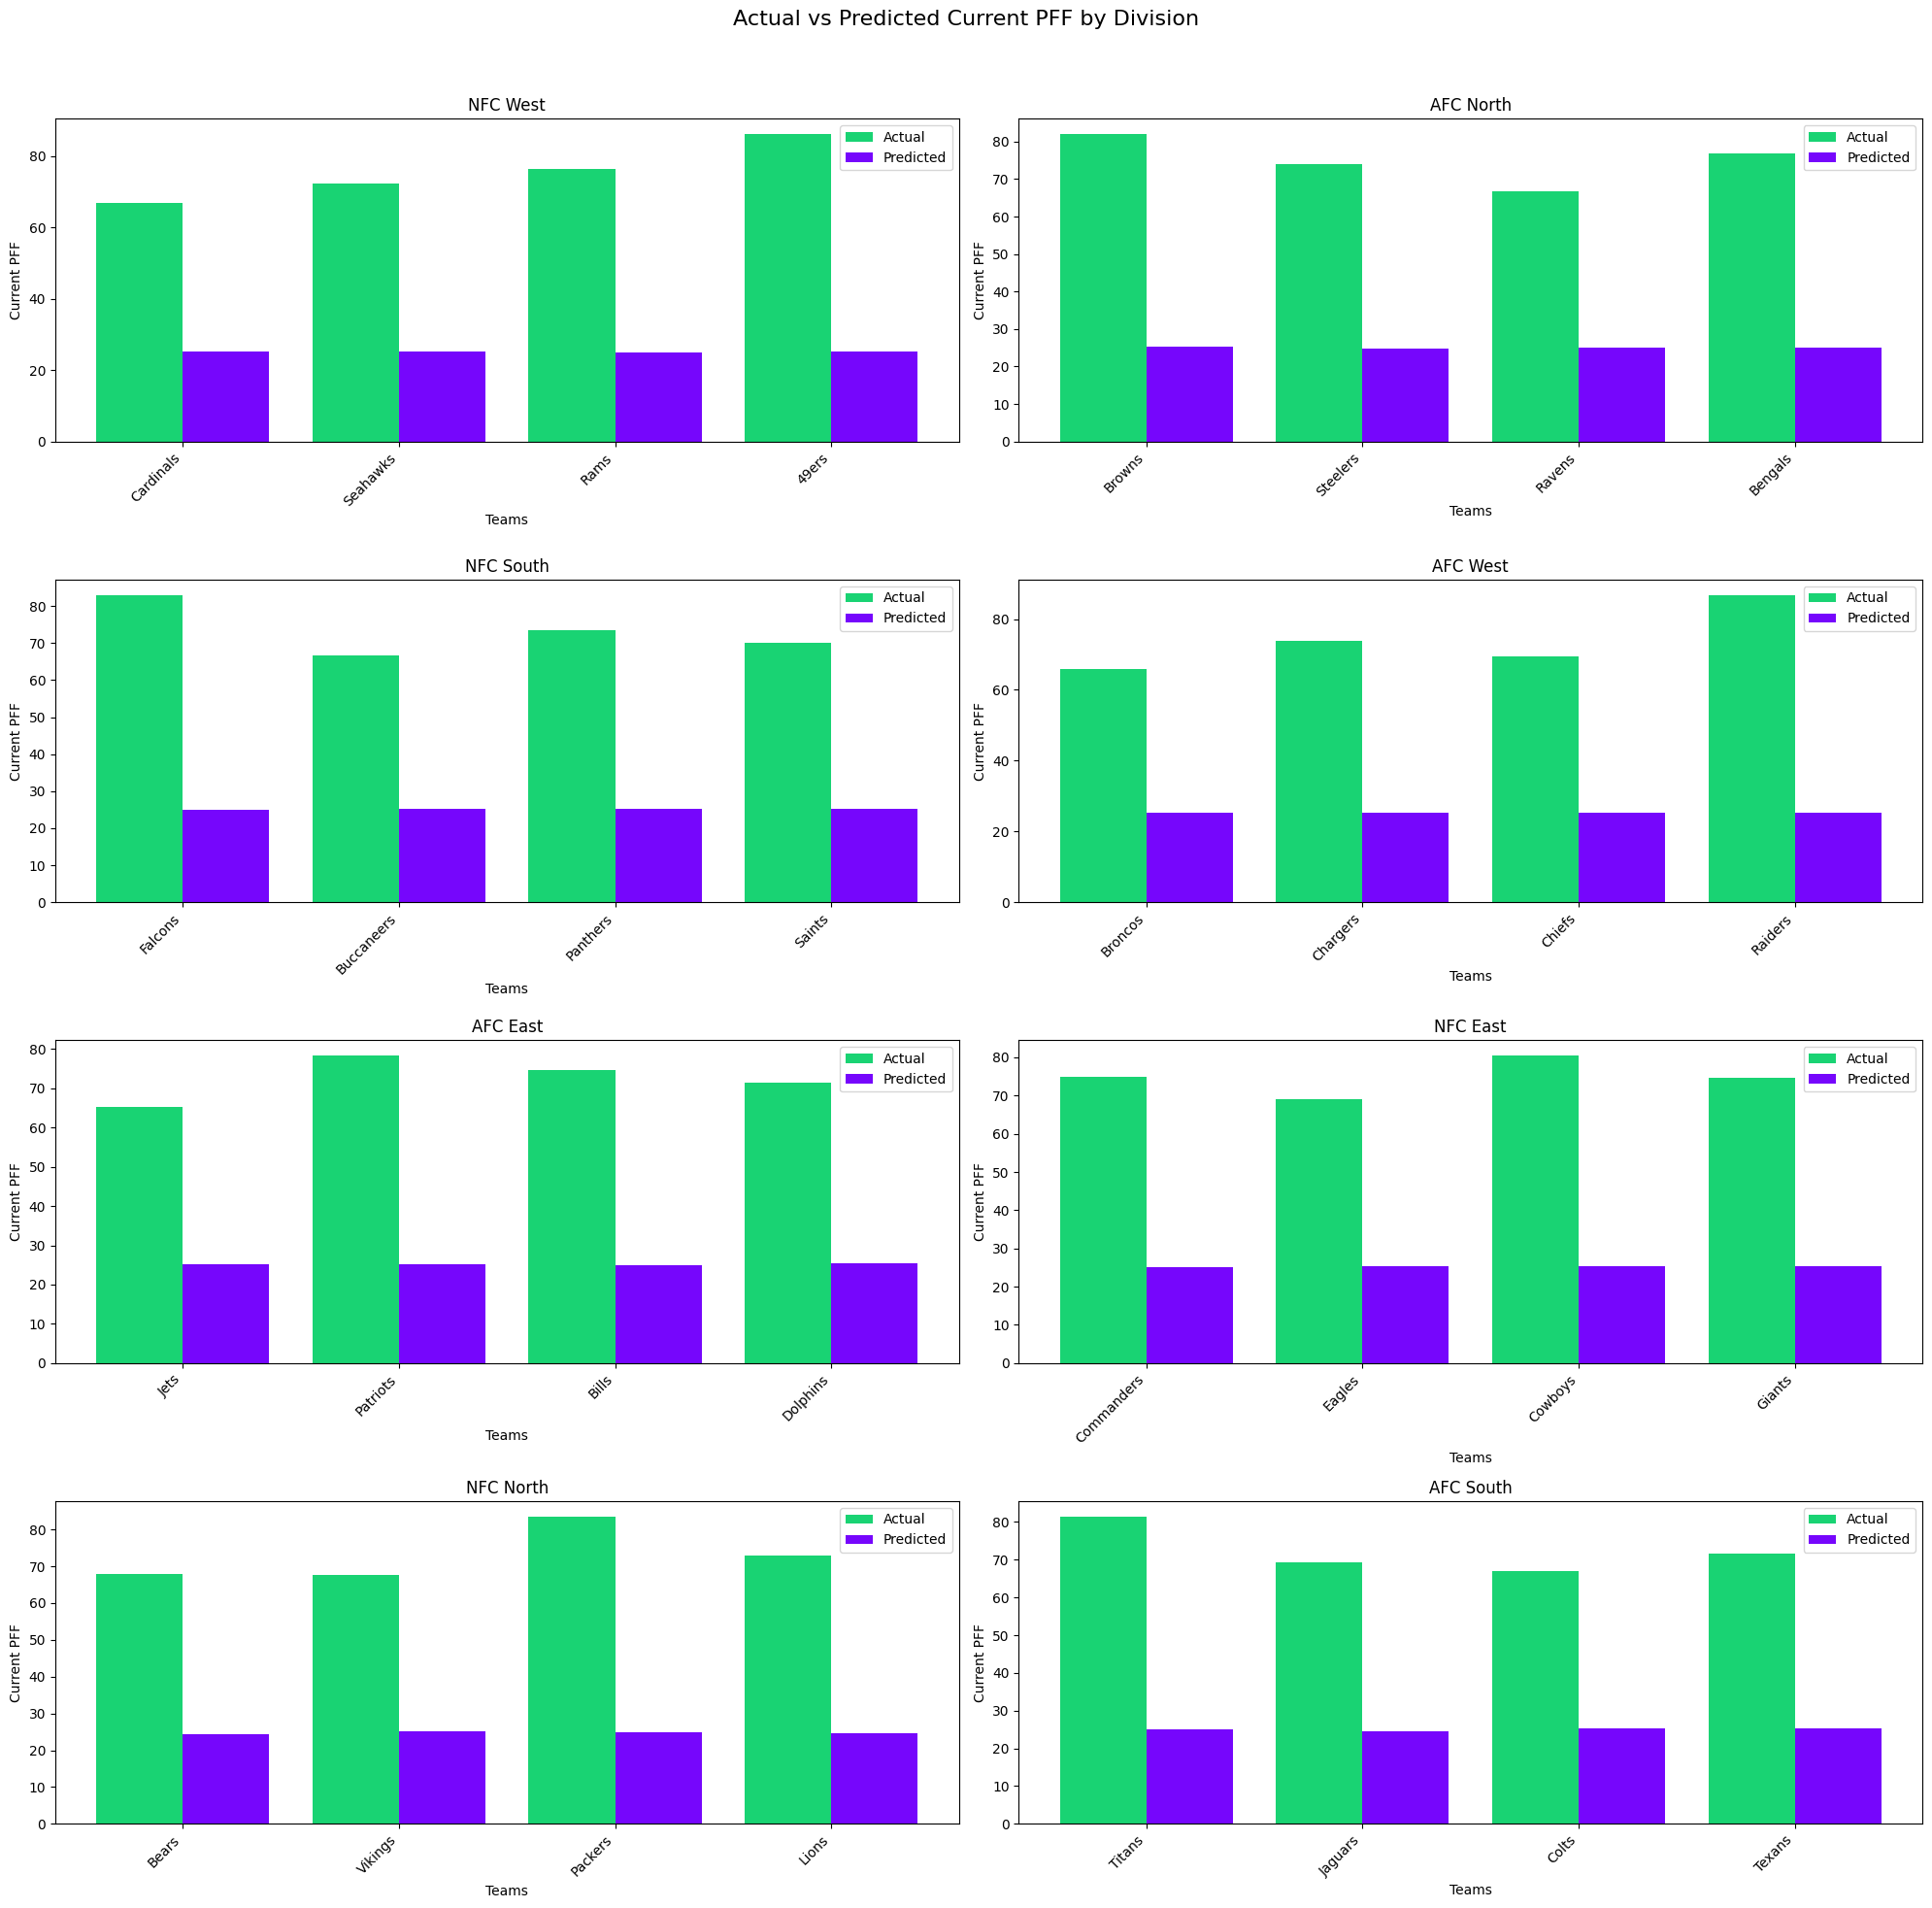

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2305.1194 - val_loss: 1811.4156
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1847.1704 - val_loss: 1383.3280
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1488.1221 - val_loss: 957.8968
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1083.5406 - val_loss: 568.6121
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 704.8527 - val_loss: 258.4417
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.7594 - val_loss: 70.0262
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 204.9249 - val_loss: 23.0610
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.1467 - val_loss: 87.3406
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 196.9756 - val_loss: 167.5827
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224.7030 - val_loss: 165.2123
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 191.1111 - val_loss: 113.6133
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

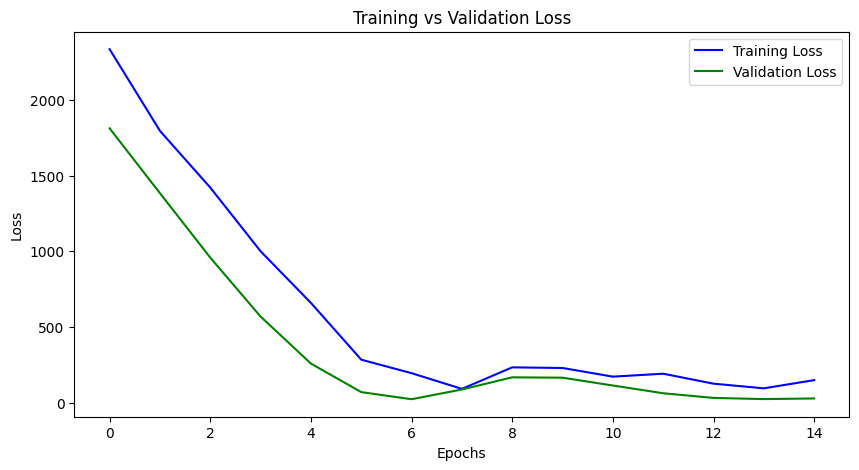

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


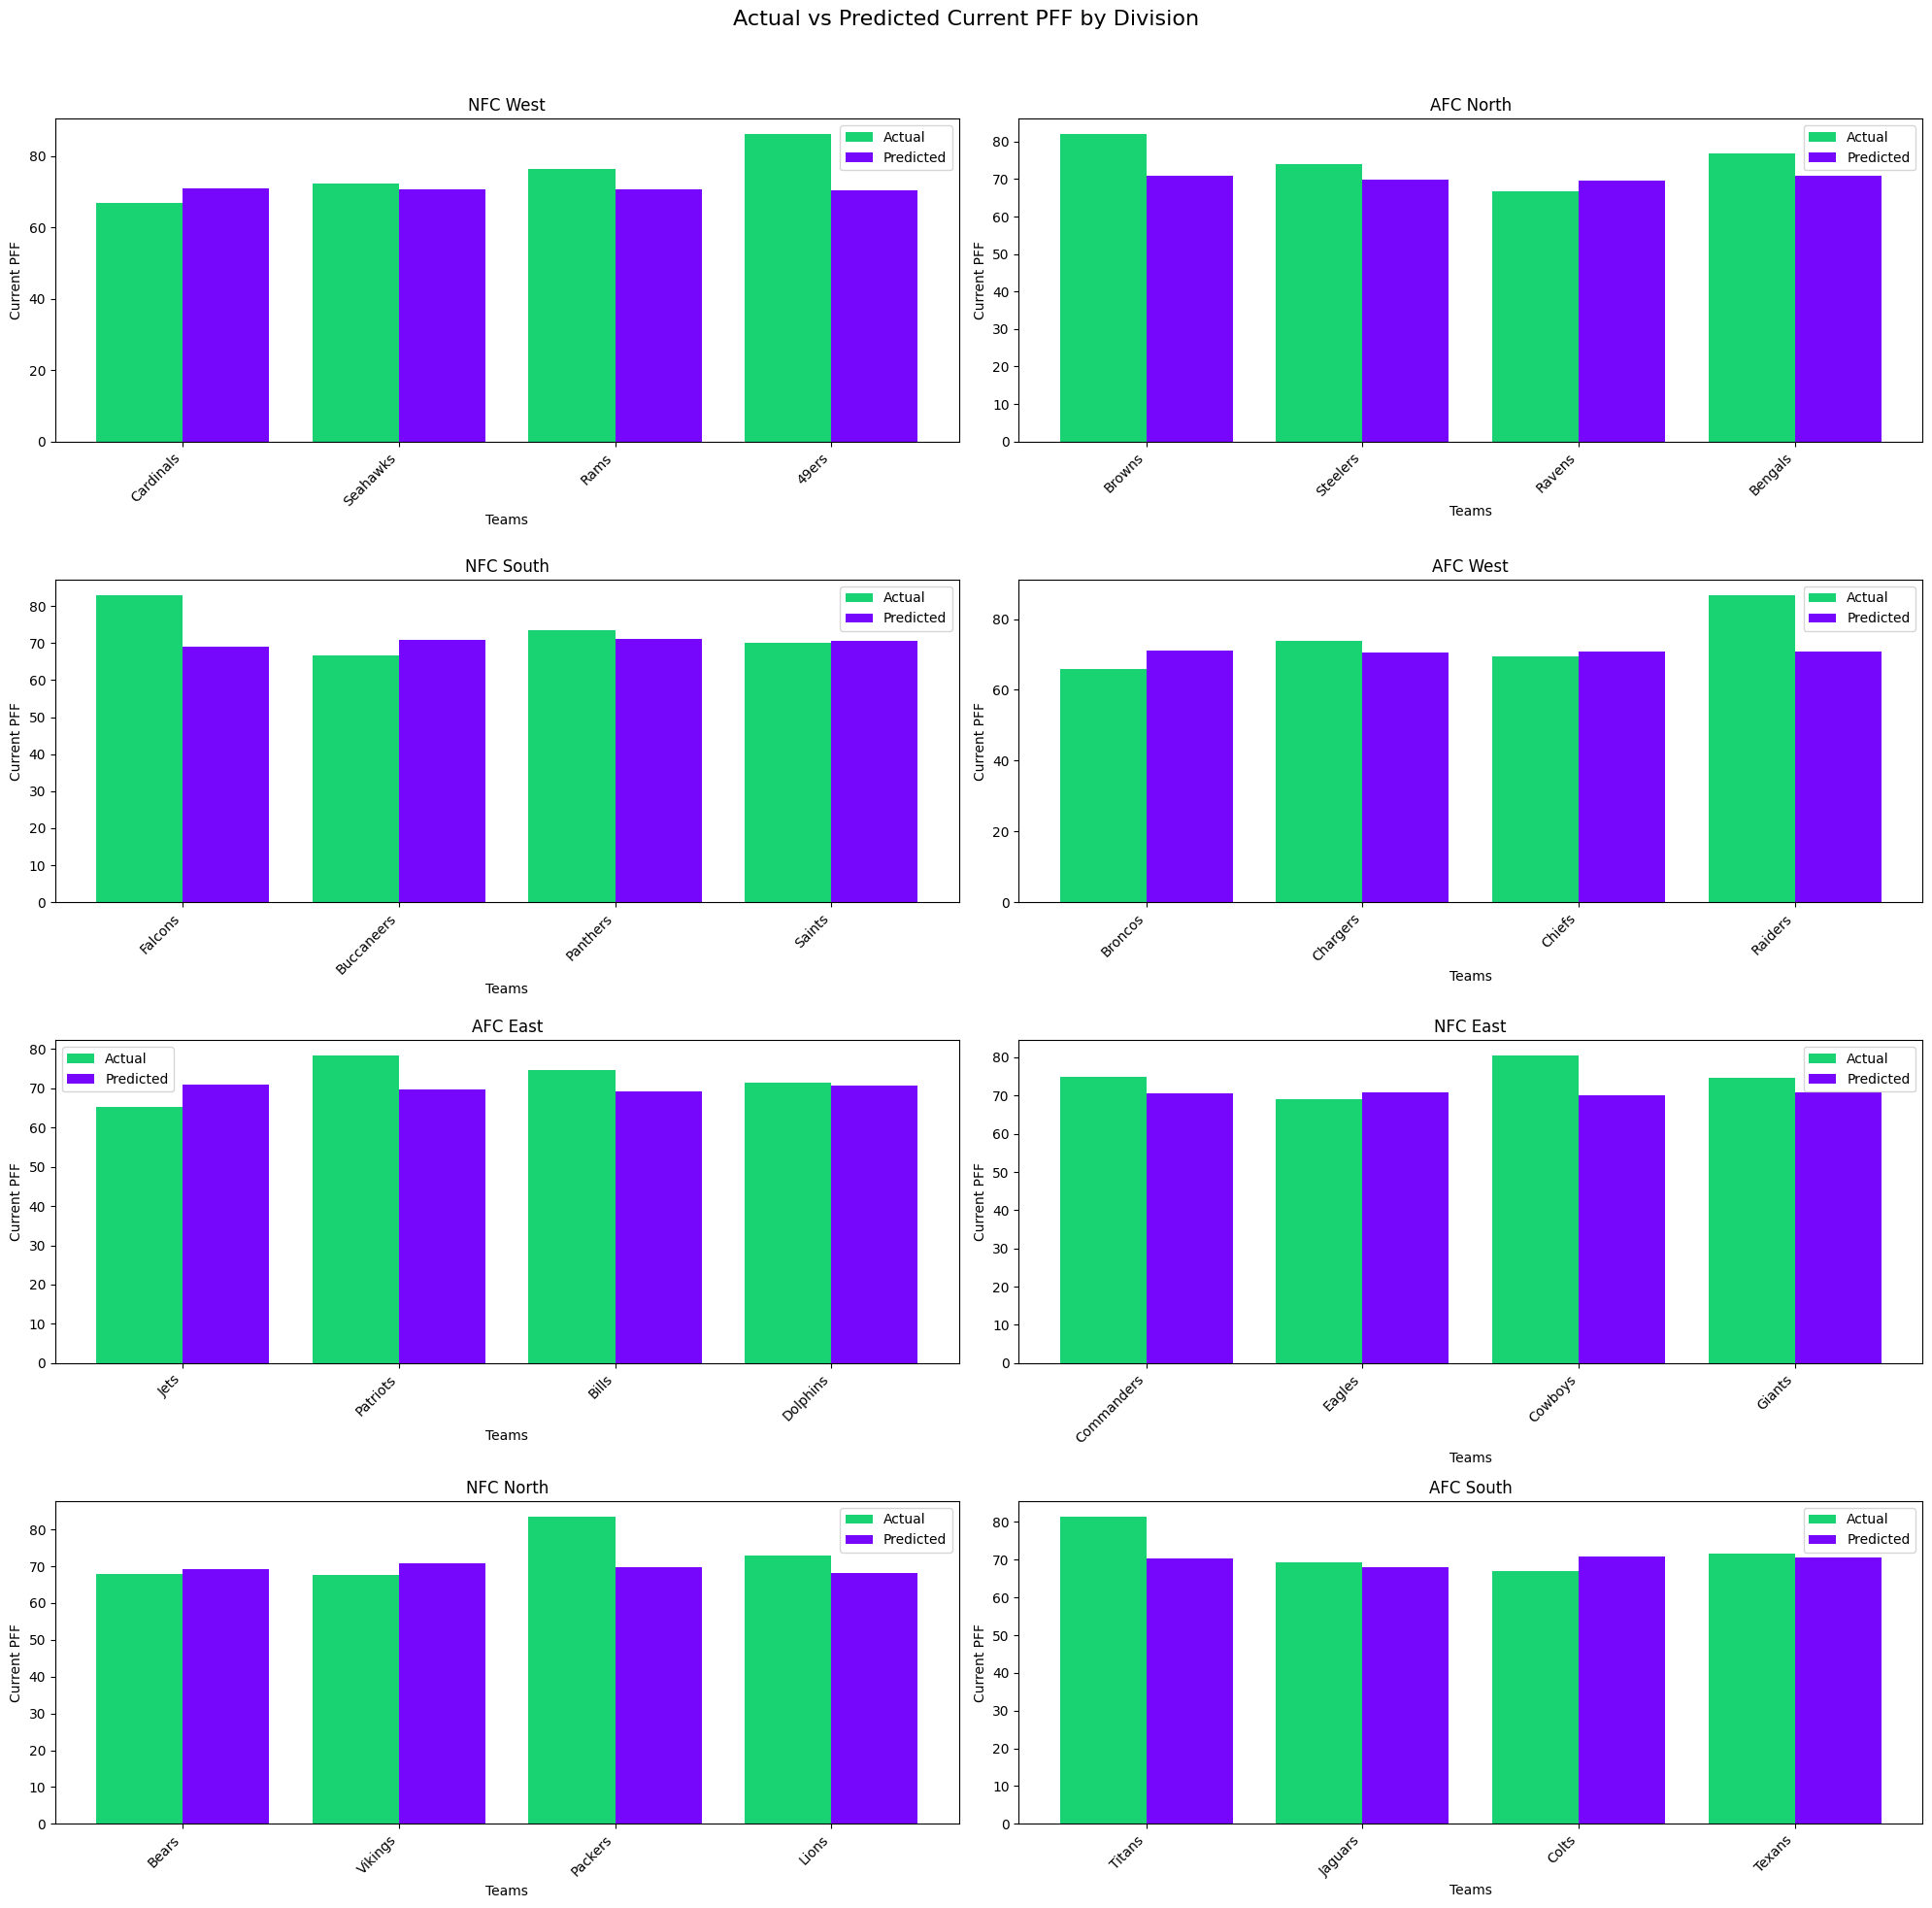

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 84.5634 - val_loss: 30.3376
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.8966 - val_loss: 29.3318
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.2146 - val_loss: 25.3105
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.8629 - val_loss: 23.8273
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.3902 - val_loss: 25.9863
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.2975 - val_loss: 29.1630
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.3377 - val_loss: 30.3275
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 105.6120 - val_loss: 32.5008
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 173.0040 - val_loss: 28.0821
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.6119 - val_loss: 26.9880
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.5294 - val_loss: 26.1913
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.019

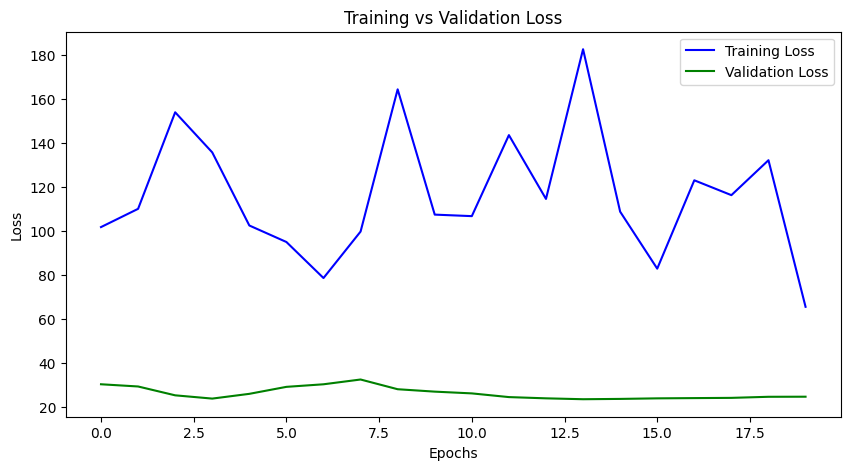

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


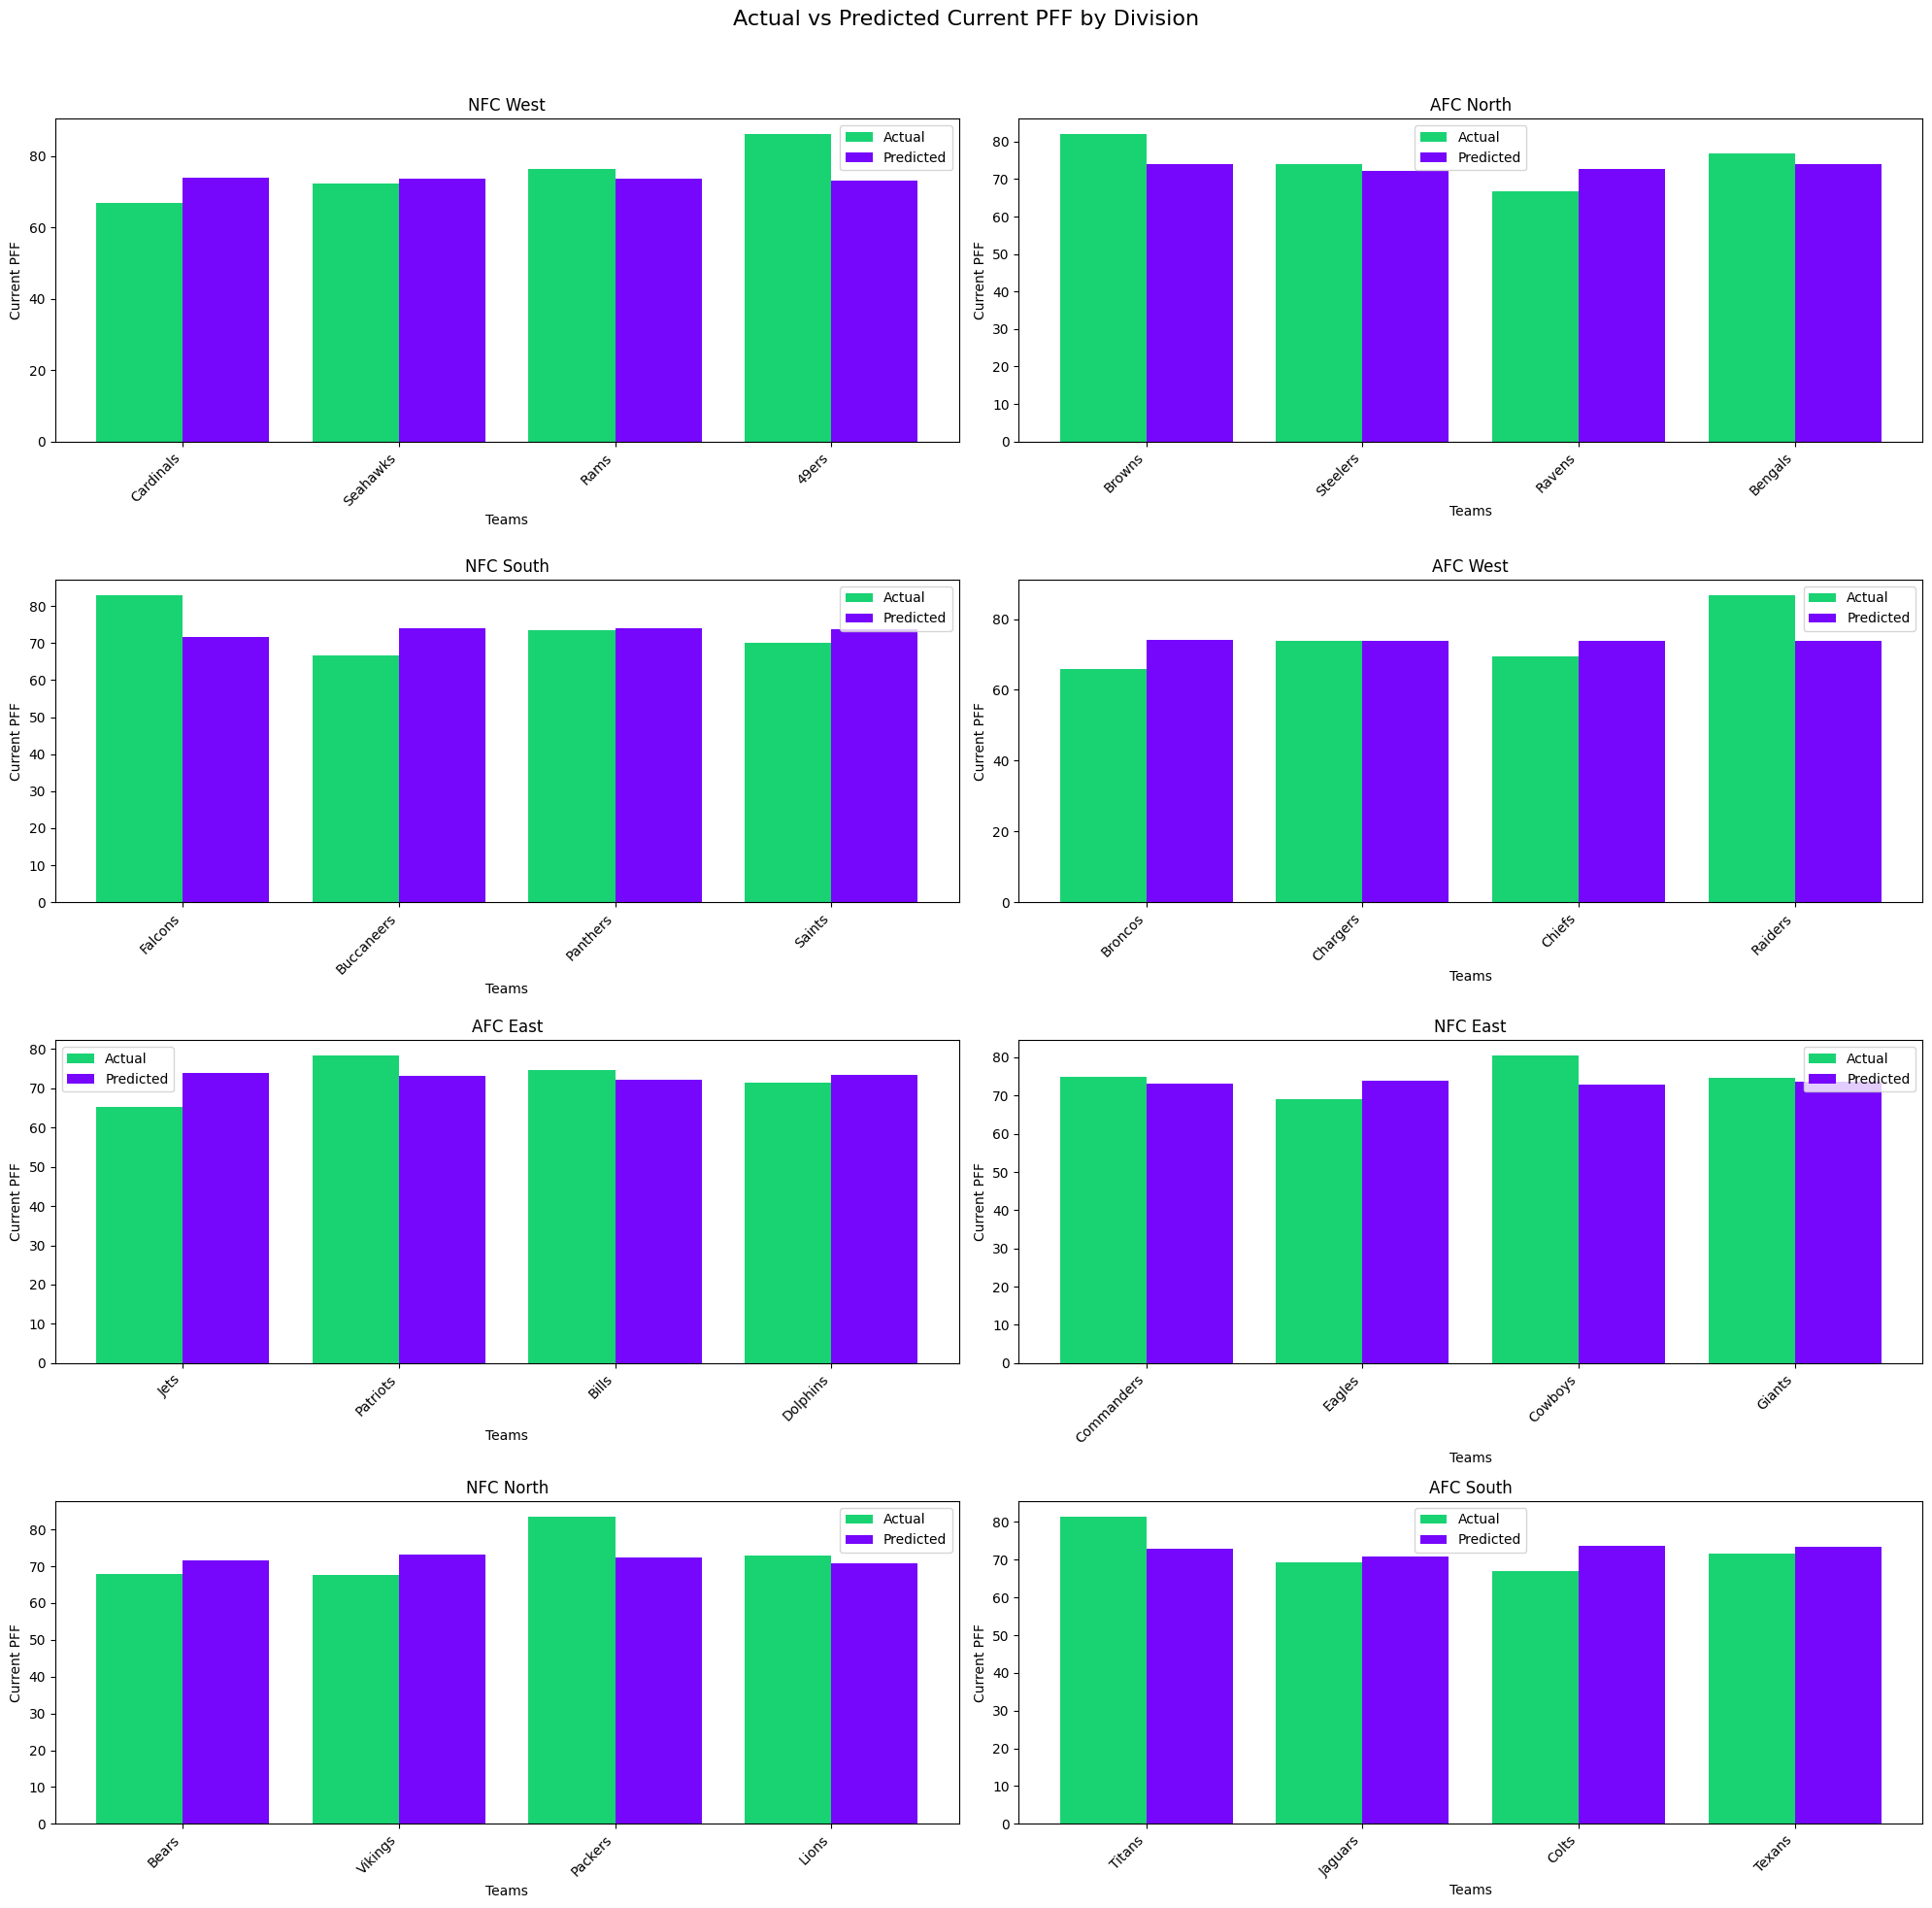

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 113.7591 - val_loss: 25.6297
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.4072 - val_loss: 25.9729
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.9401 - val_loss: 27.1431
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113.0291 - val_loss: 26.7754
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.8349 - val_loss: 25.4063
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.5352 - val_loss: 24.5044
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.6491 - val_loss: 24.7817
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.4379 - val_loss: 24.0936
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.5638 - val_loss: 23.5024
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.3808 - val_loss: 23.3104
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.2583 - val_loss: 23.2455
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.5815 -

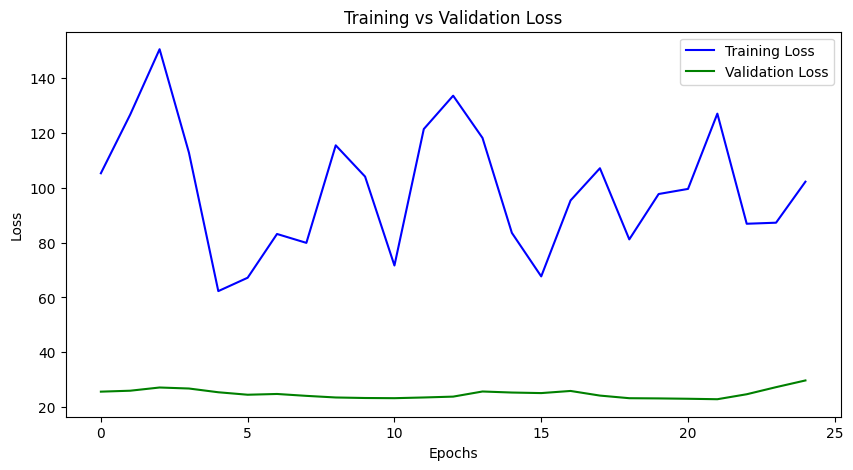

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


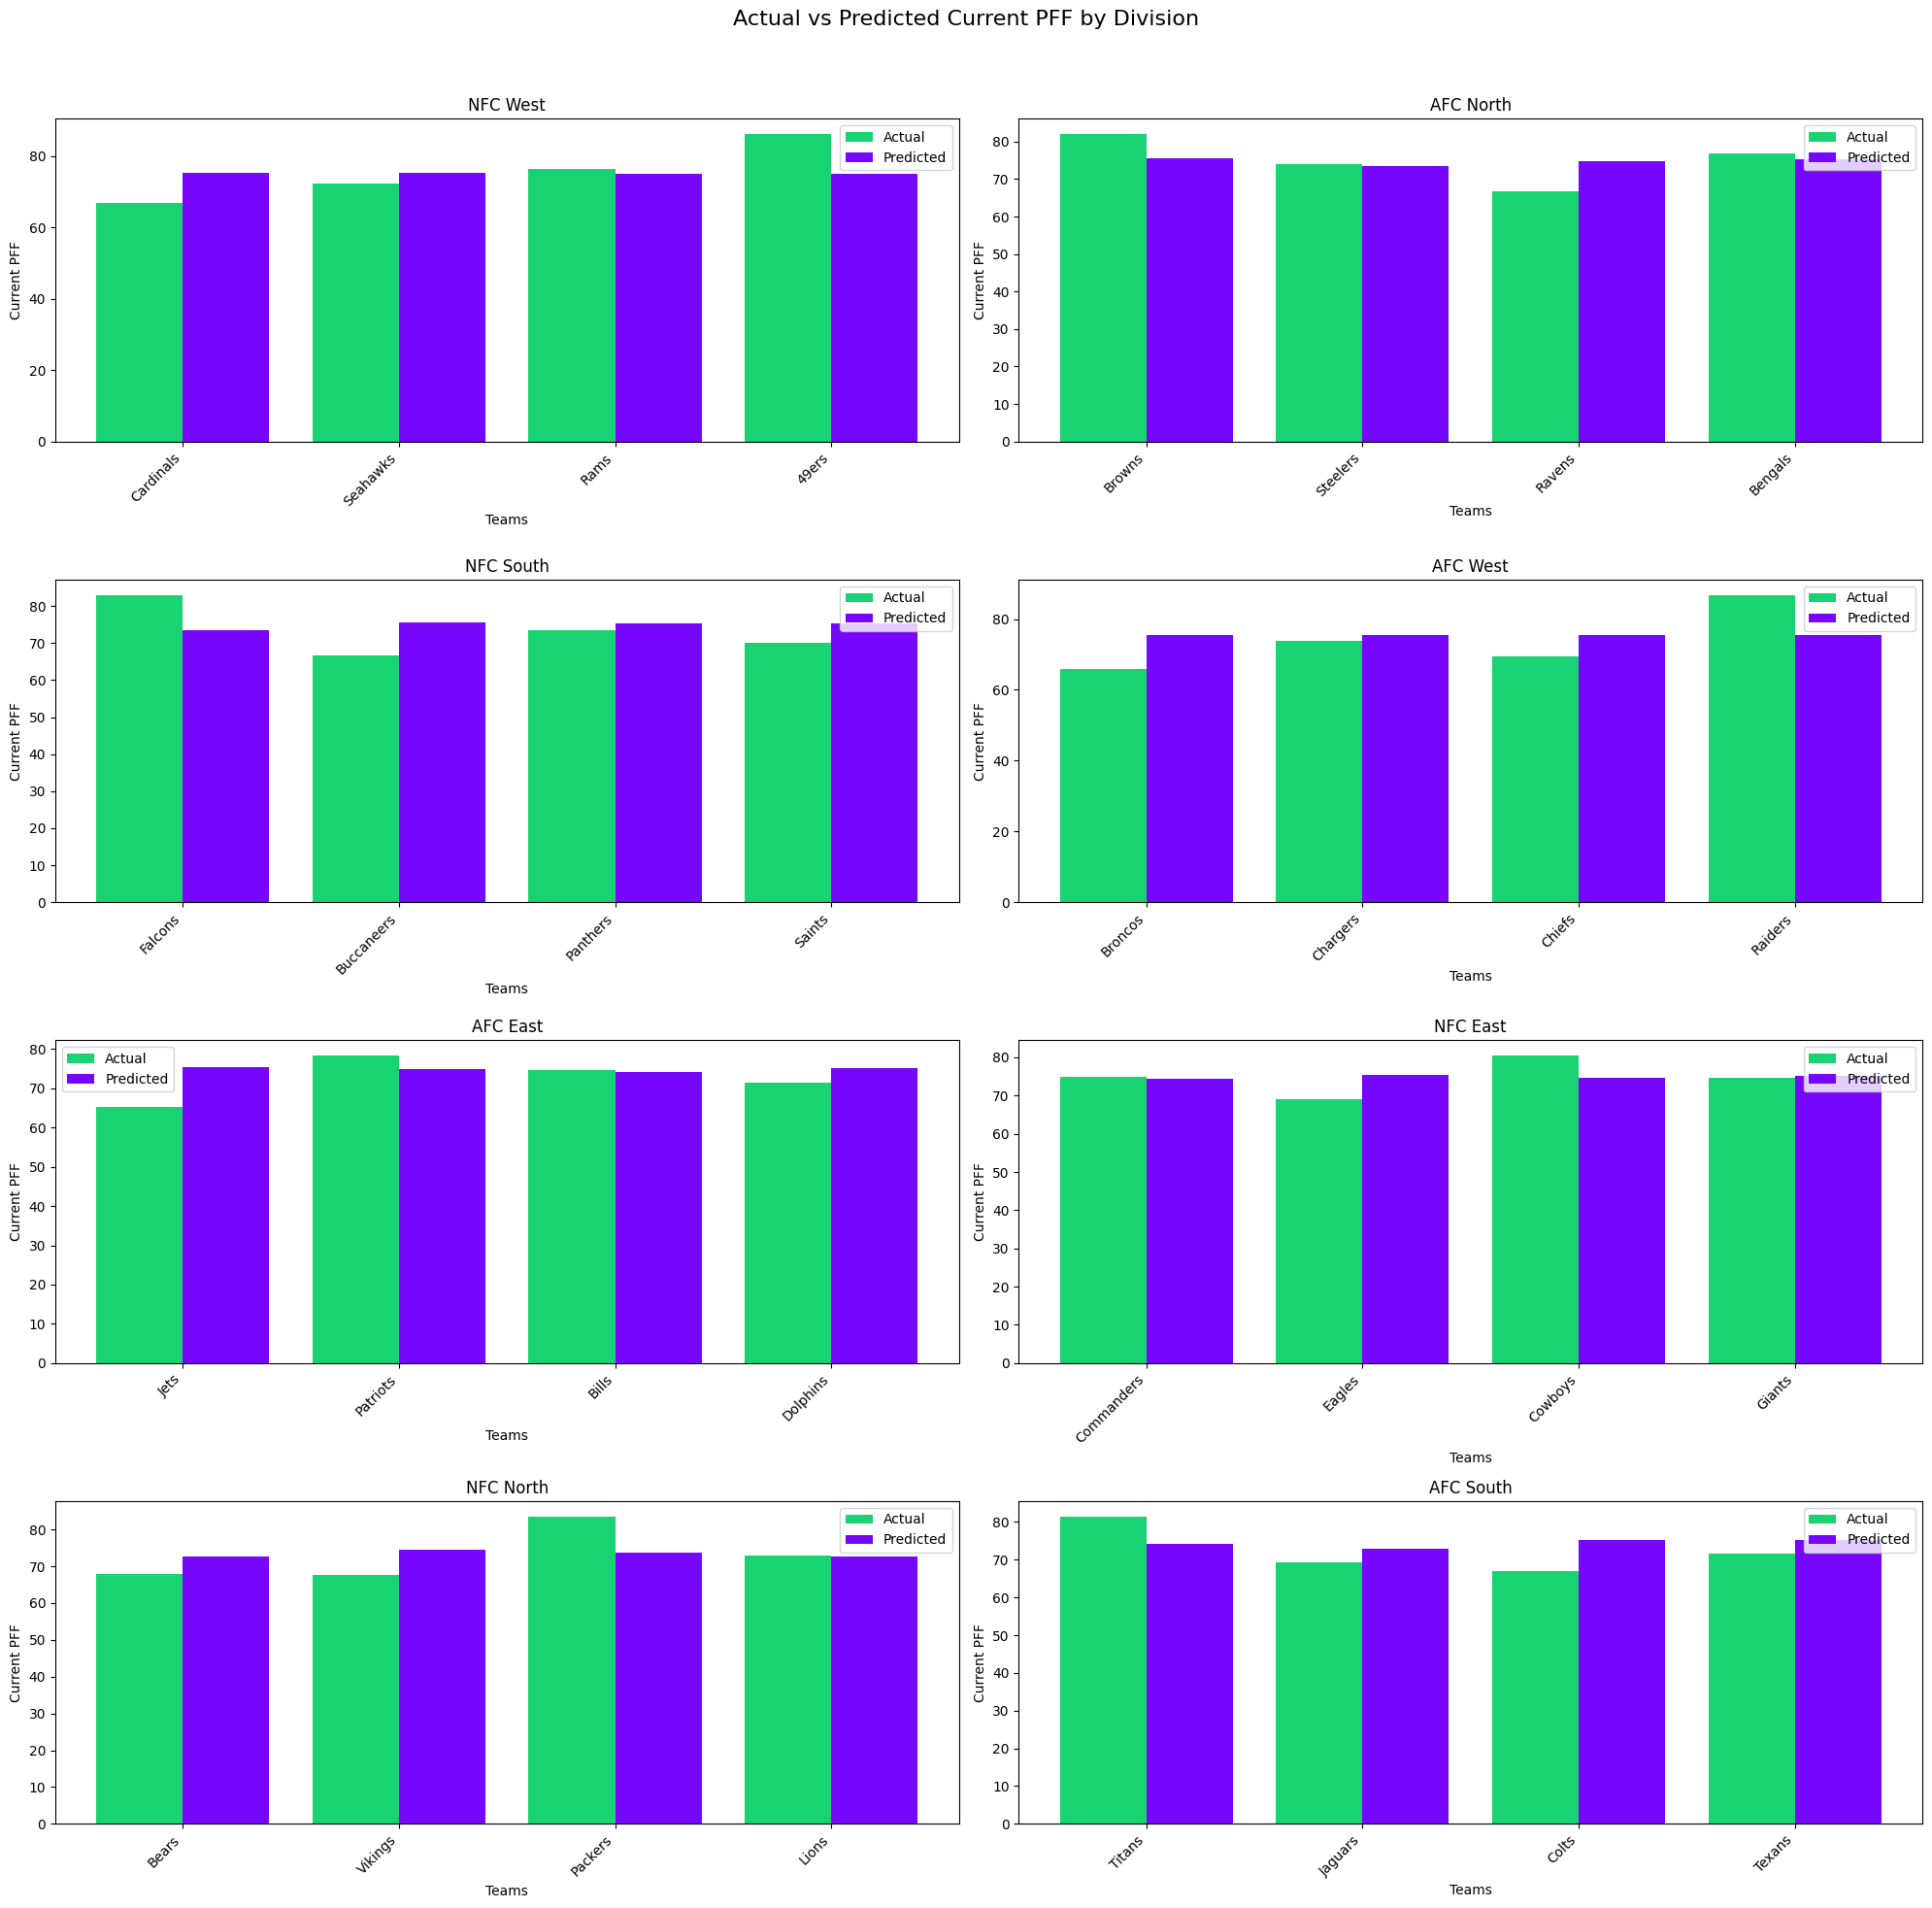

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 79.3584 - val_loss: 28.8271
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.3423 - val_loss: 25.9002
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 118.4167 - val_loss: 24.3040
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93.2961 - val_loss: 23.4720
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.2623 - val_loss: 23.5106
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.8619 - val_loss: 23.8276
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.7982 - val_loss: 23.5473
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 108.5368 - val_loss: 23.7894
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.8352 - val_loss: 23.8467
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.0488 - val_loss: 24.2322
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.8827 - val_loss: 24.0345
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.6856 - v

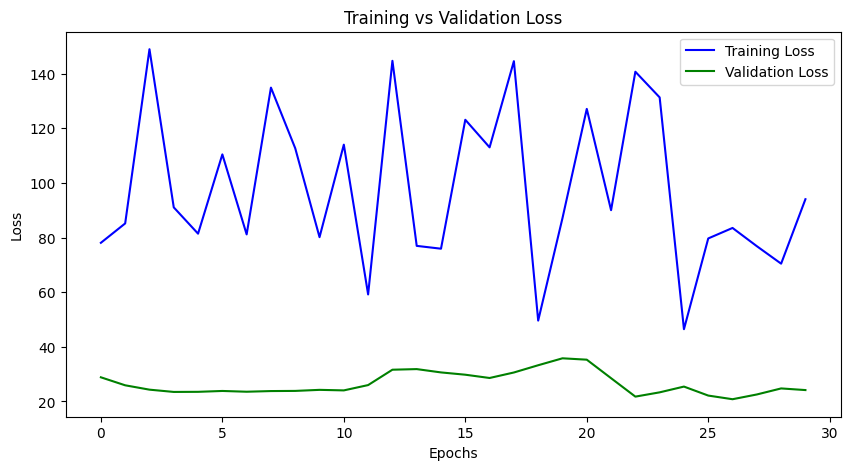

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


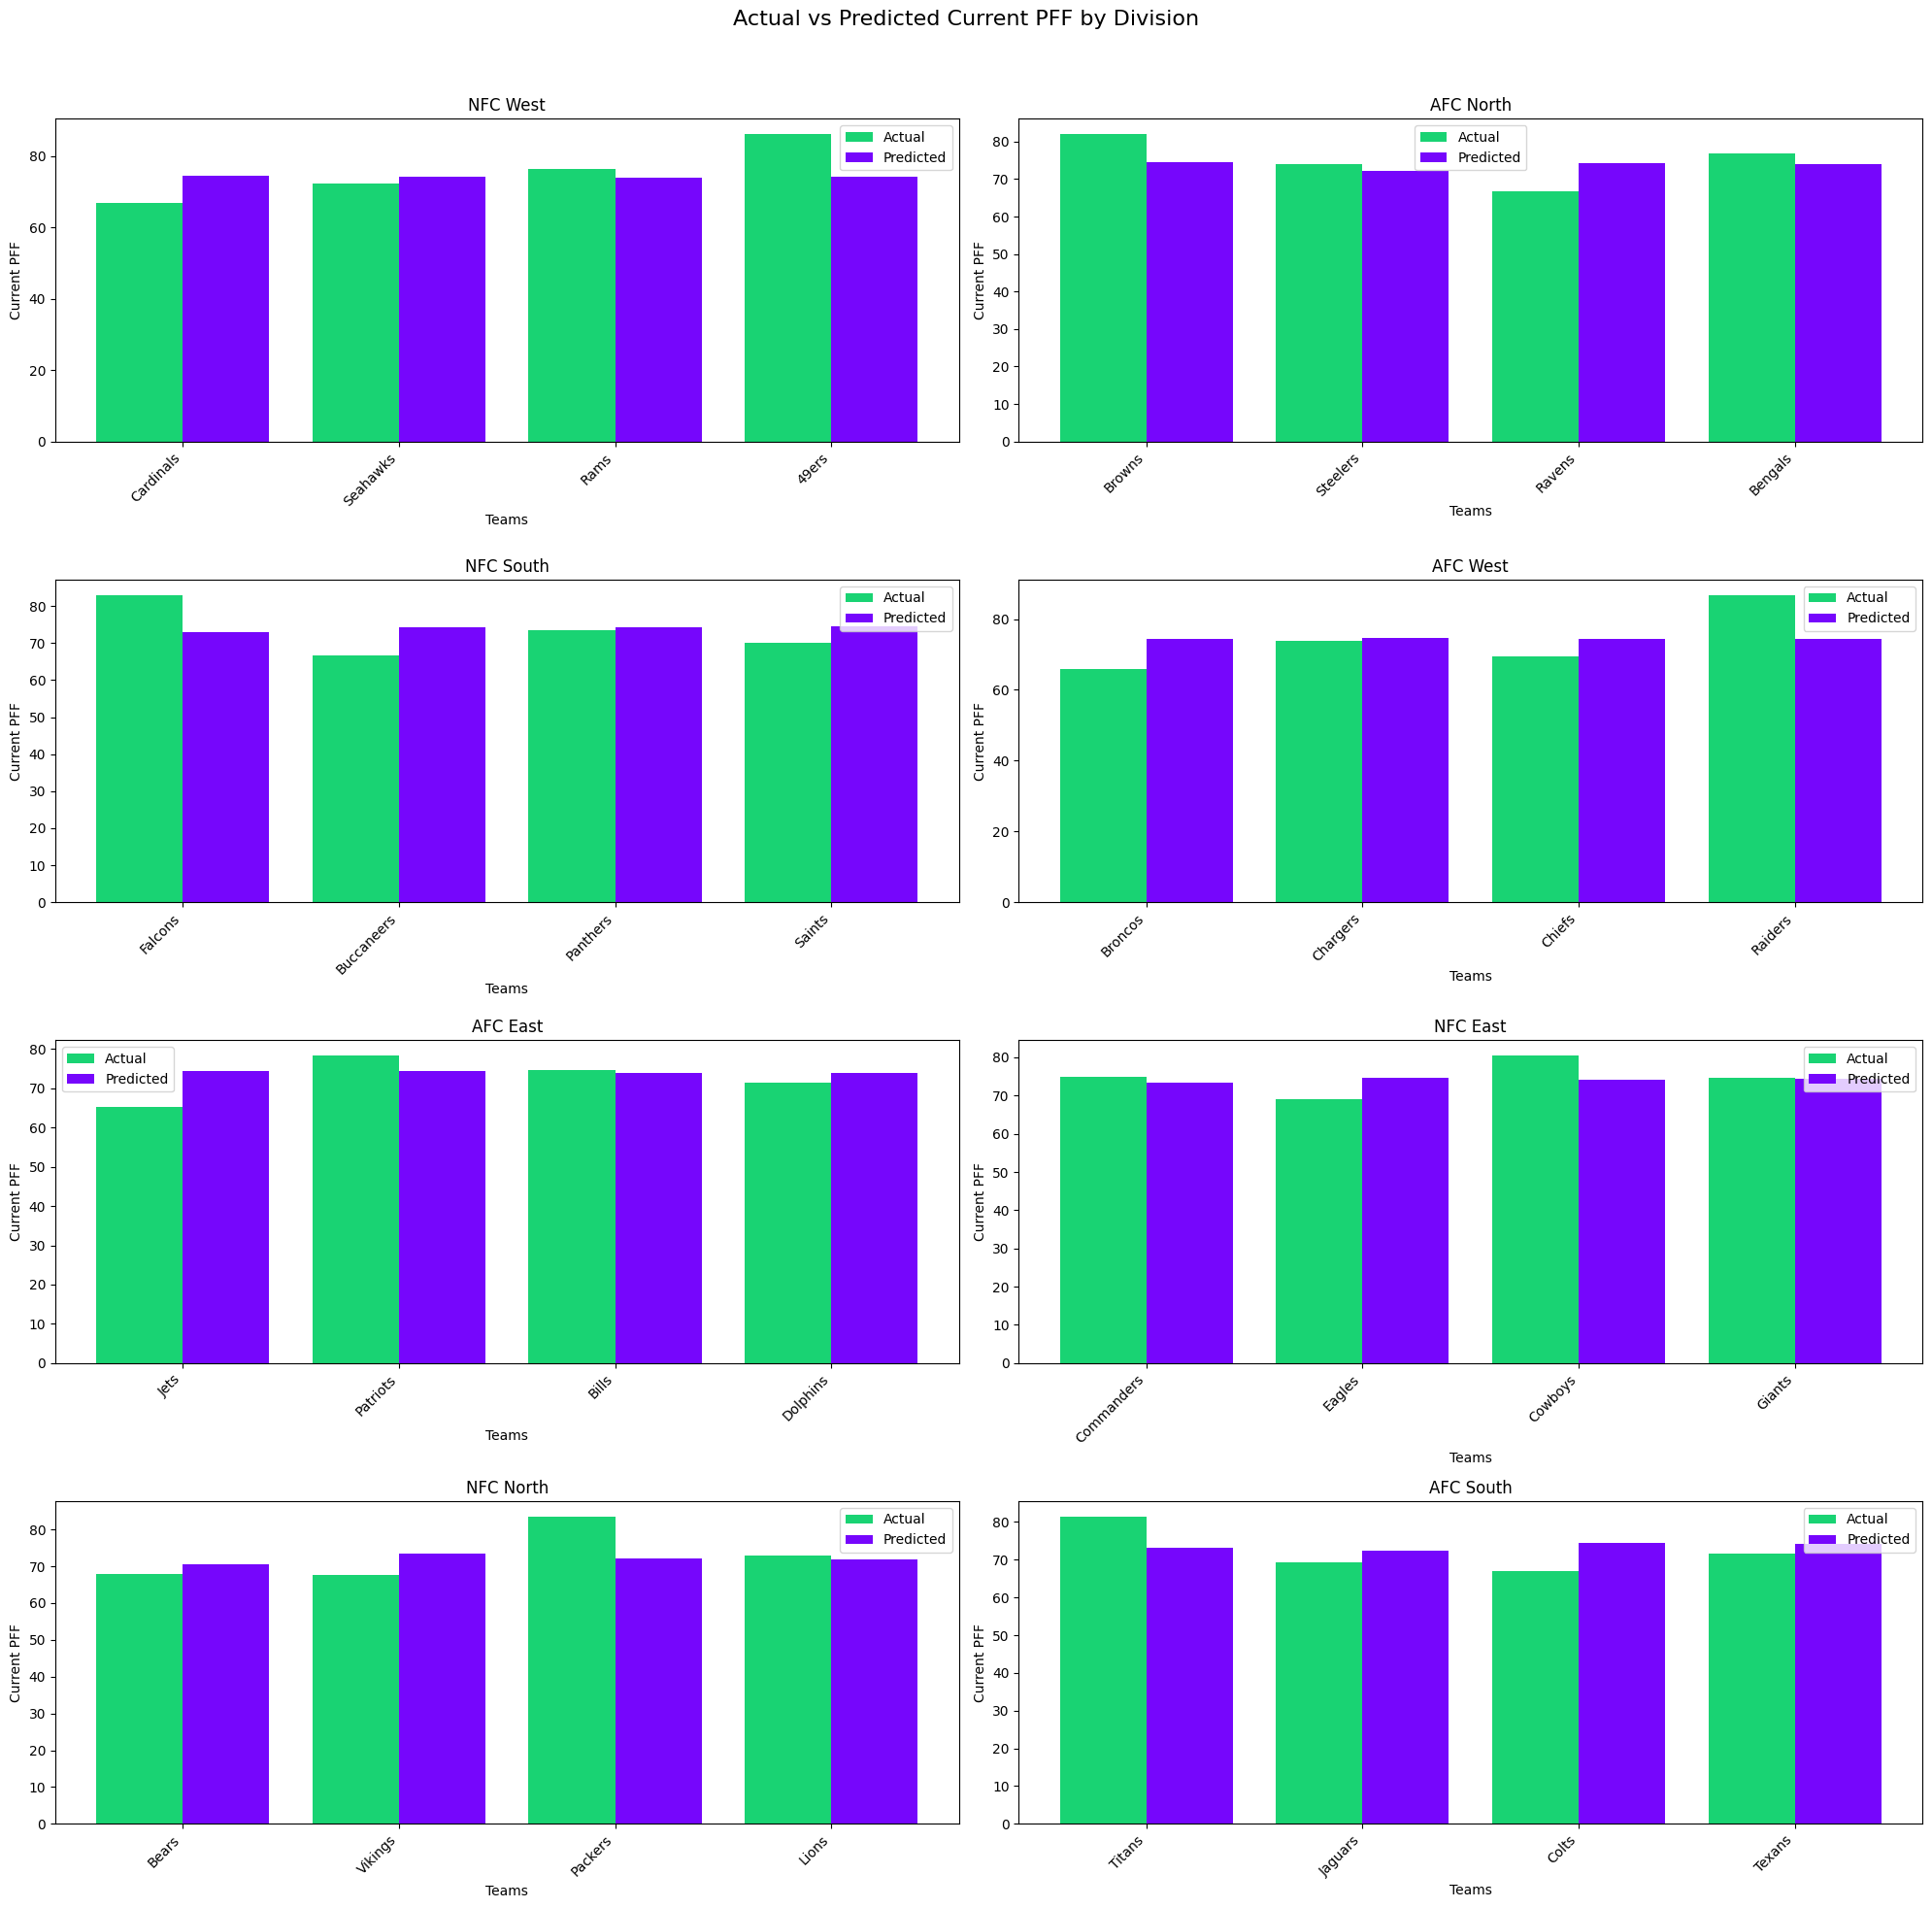

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.3145 - val_loss: 25.8628
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.6327 - val_loss: 30.3682
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.7578 - val_loss: 39.1909
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.4997 - val_loss: 38.2418
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.8370 - val_loss: 30.3249
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.6257 - val_loss: 23.8787
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.7695 - val_loss: 23.1386
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.4854 - val_loss: 24.5652
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.7597 - val_loss: 25.4513
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114.4426 - val_loss: 26.6248
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 120.9126 - val_loss: 25.2158
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.5239 

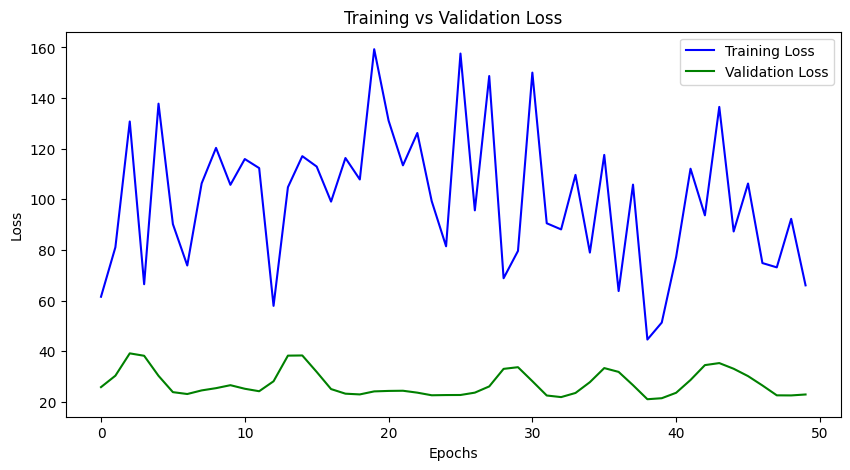

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


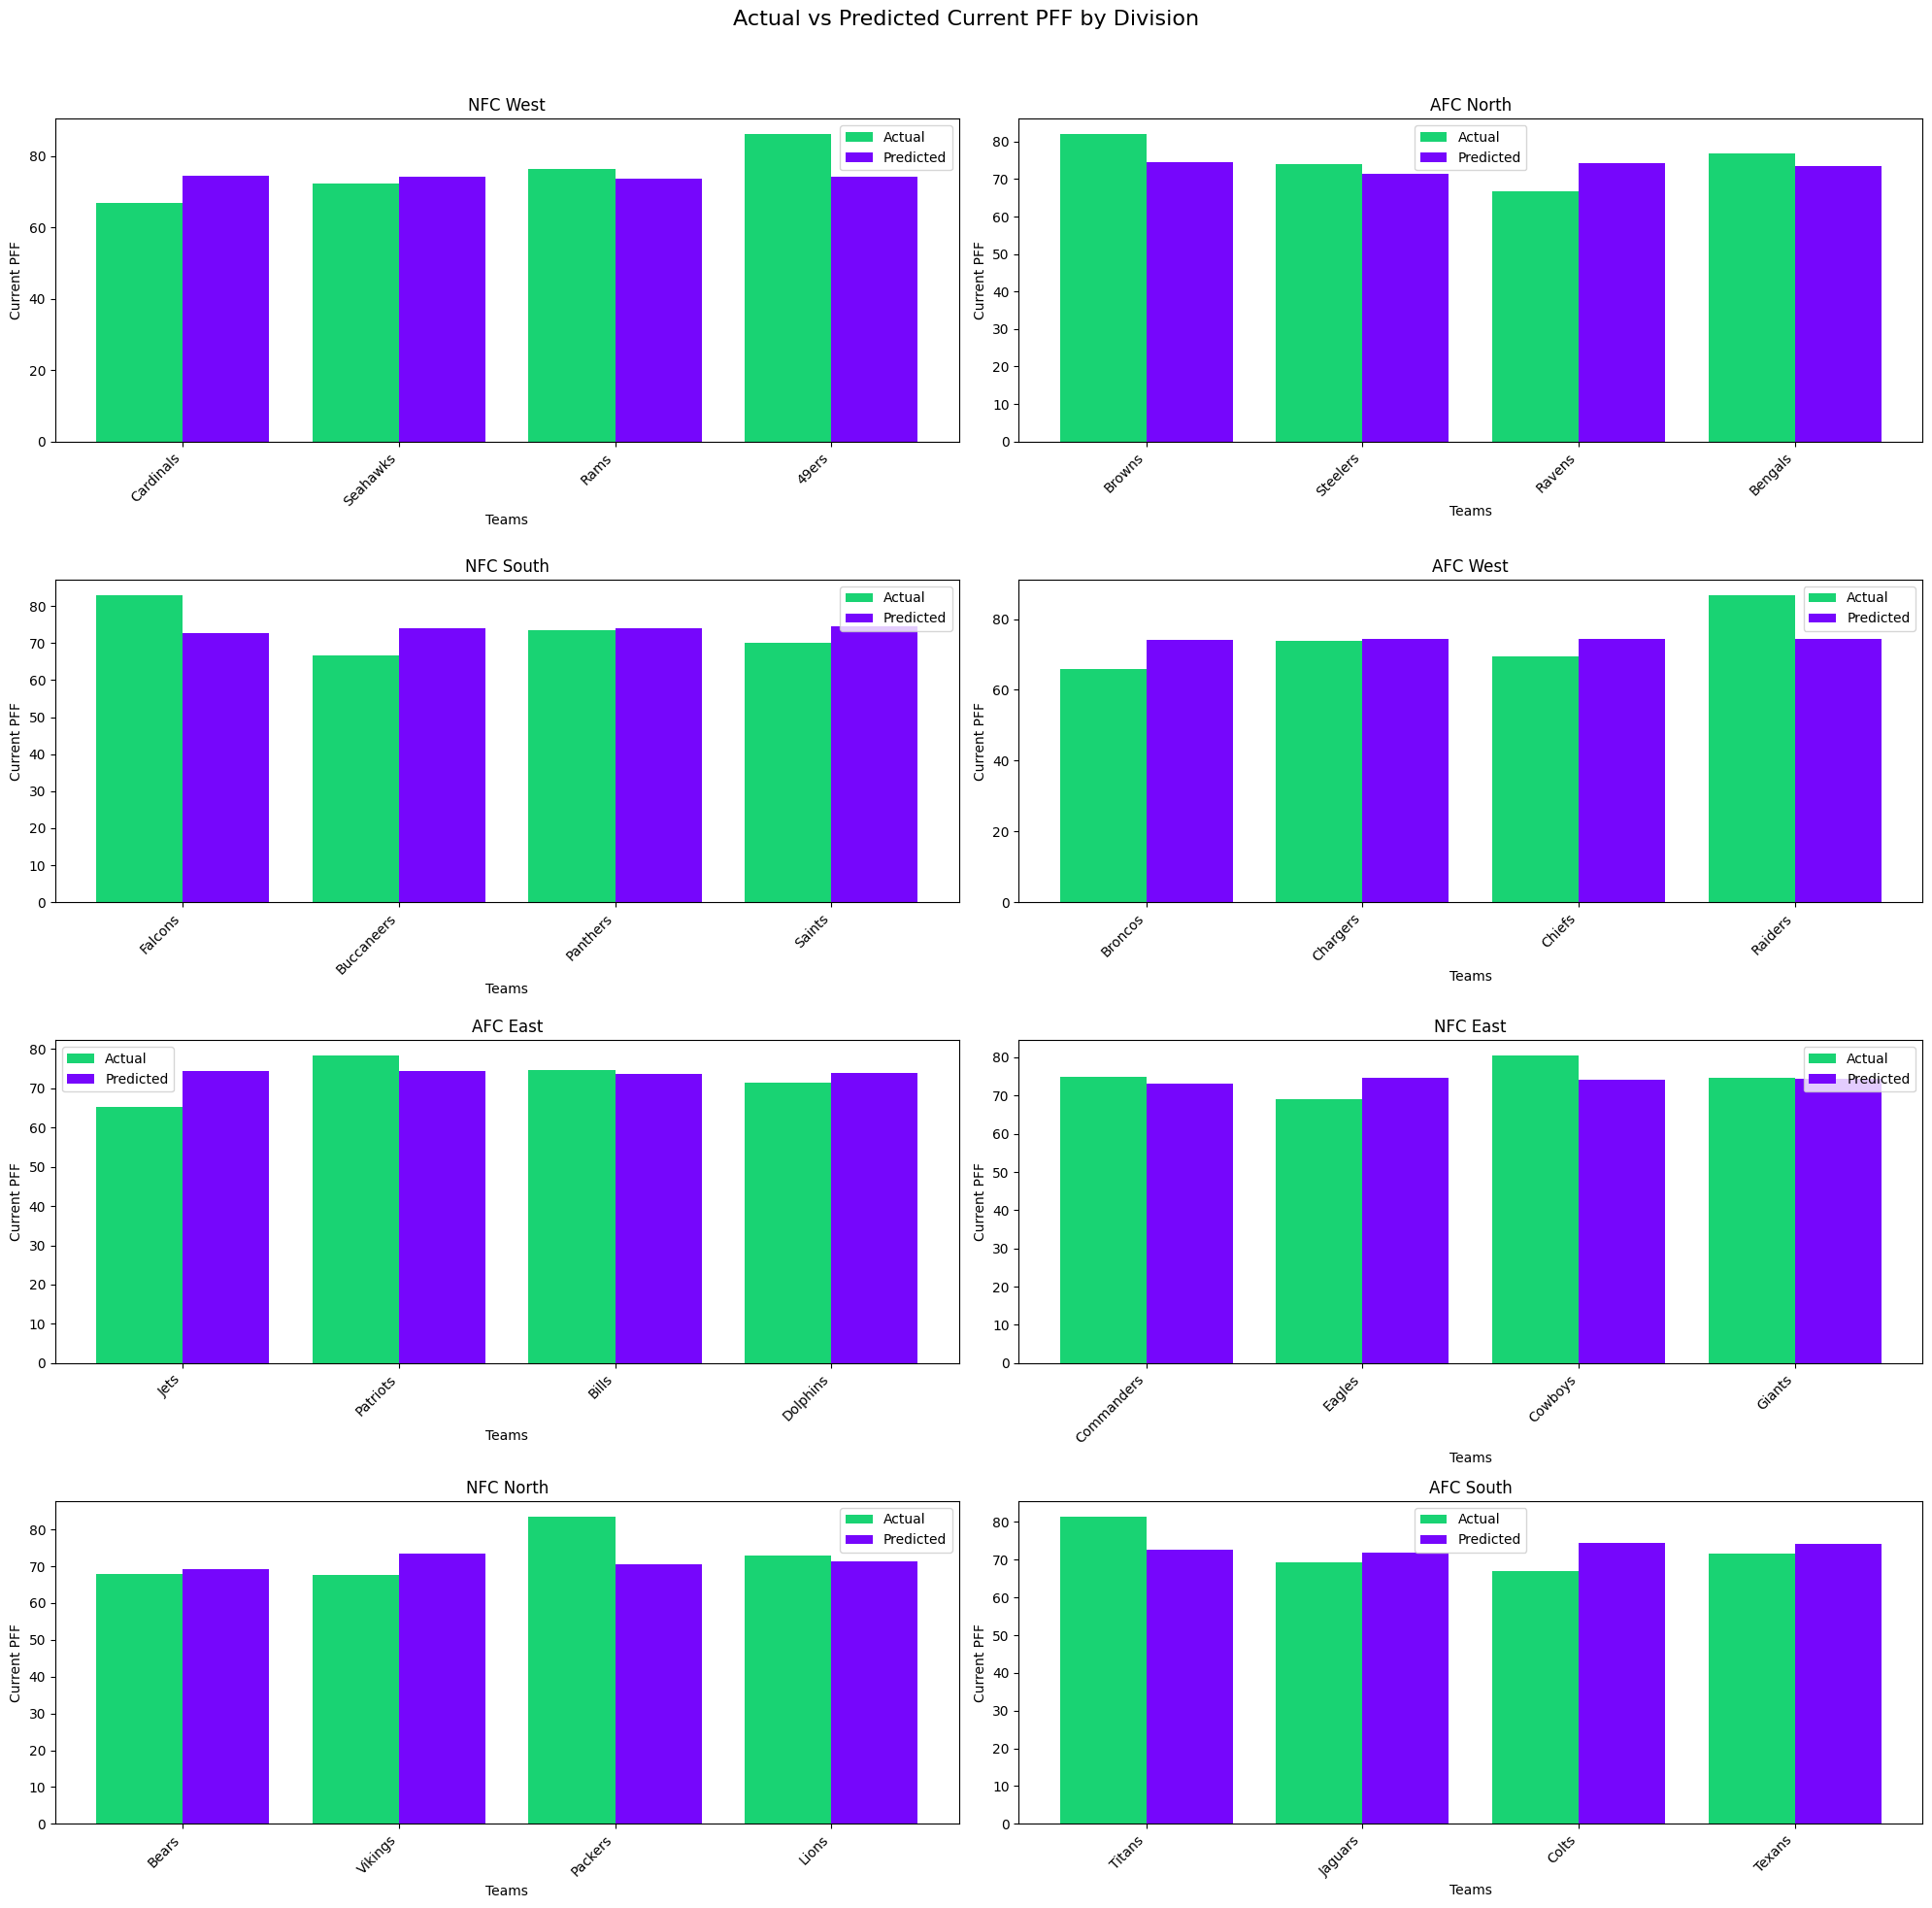

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 70.6039 - val_loss: 21.7945
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 107.3487 - val_loss: 19.3795
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.9256 - val_loss: 19.4650
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.4952 - val_loss: 19.8885
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.3802 - val_loss: 25.0717
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.5370 - val_loss: 31.8555
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.7934 - val_loss: 30.0985
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.9208 - val_loss: 24.4699
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.4909 - val_loss: 22.3685
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.3022 - val_loss: 21.9254
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.9606 - val_loss: 22.1156
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11

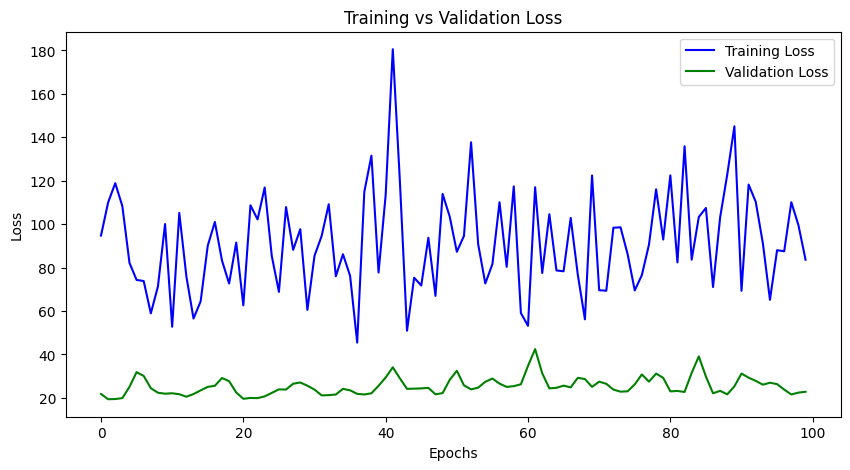

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


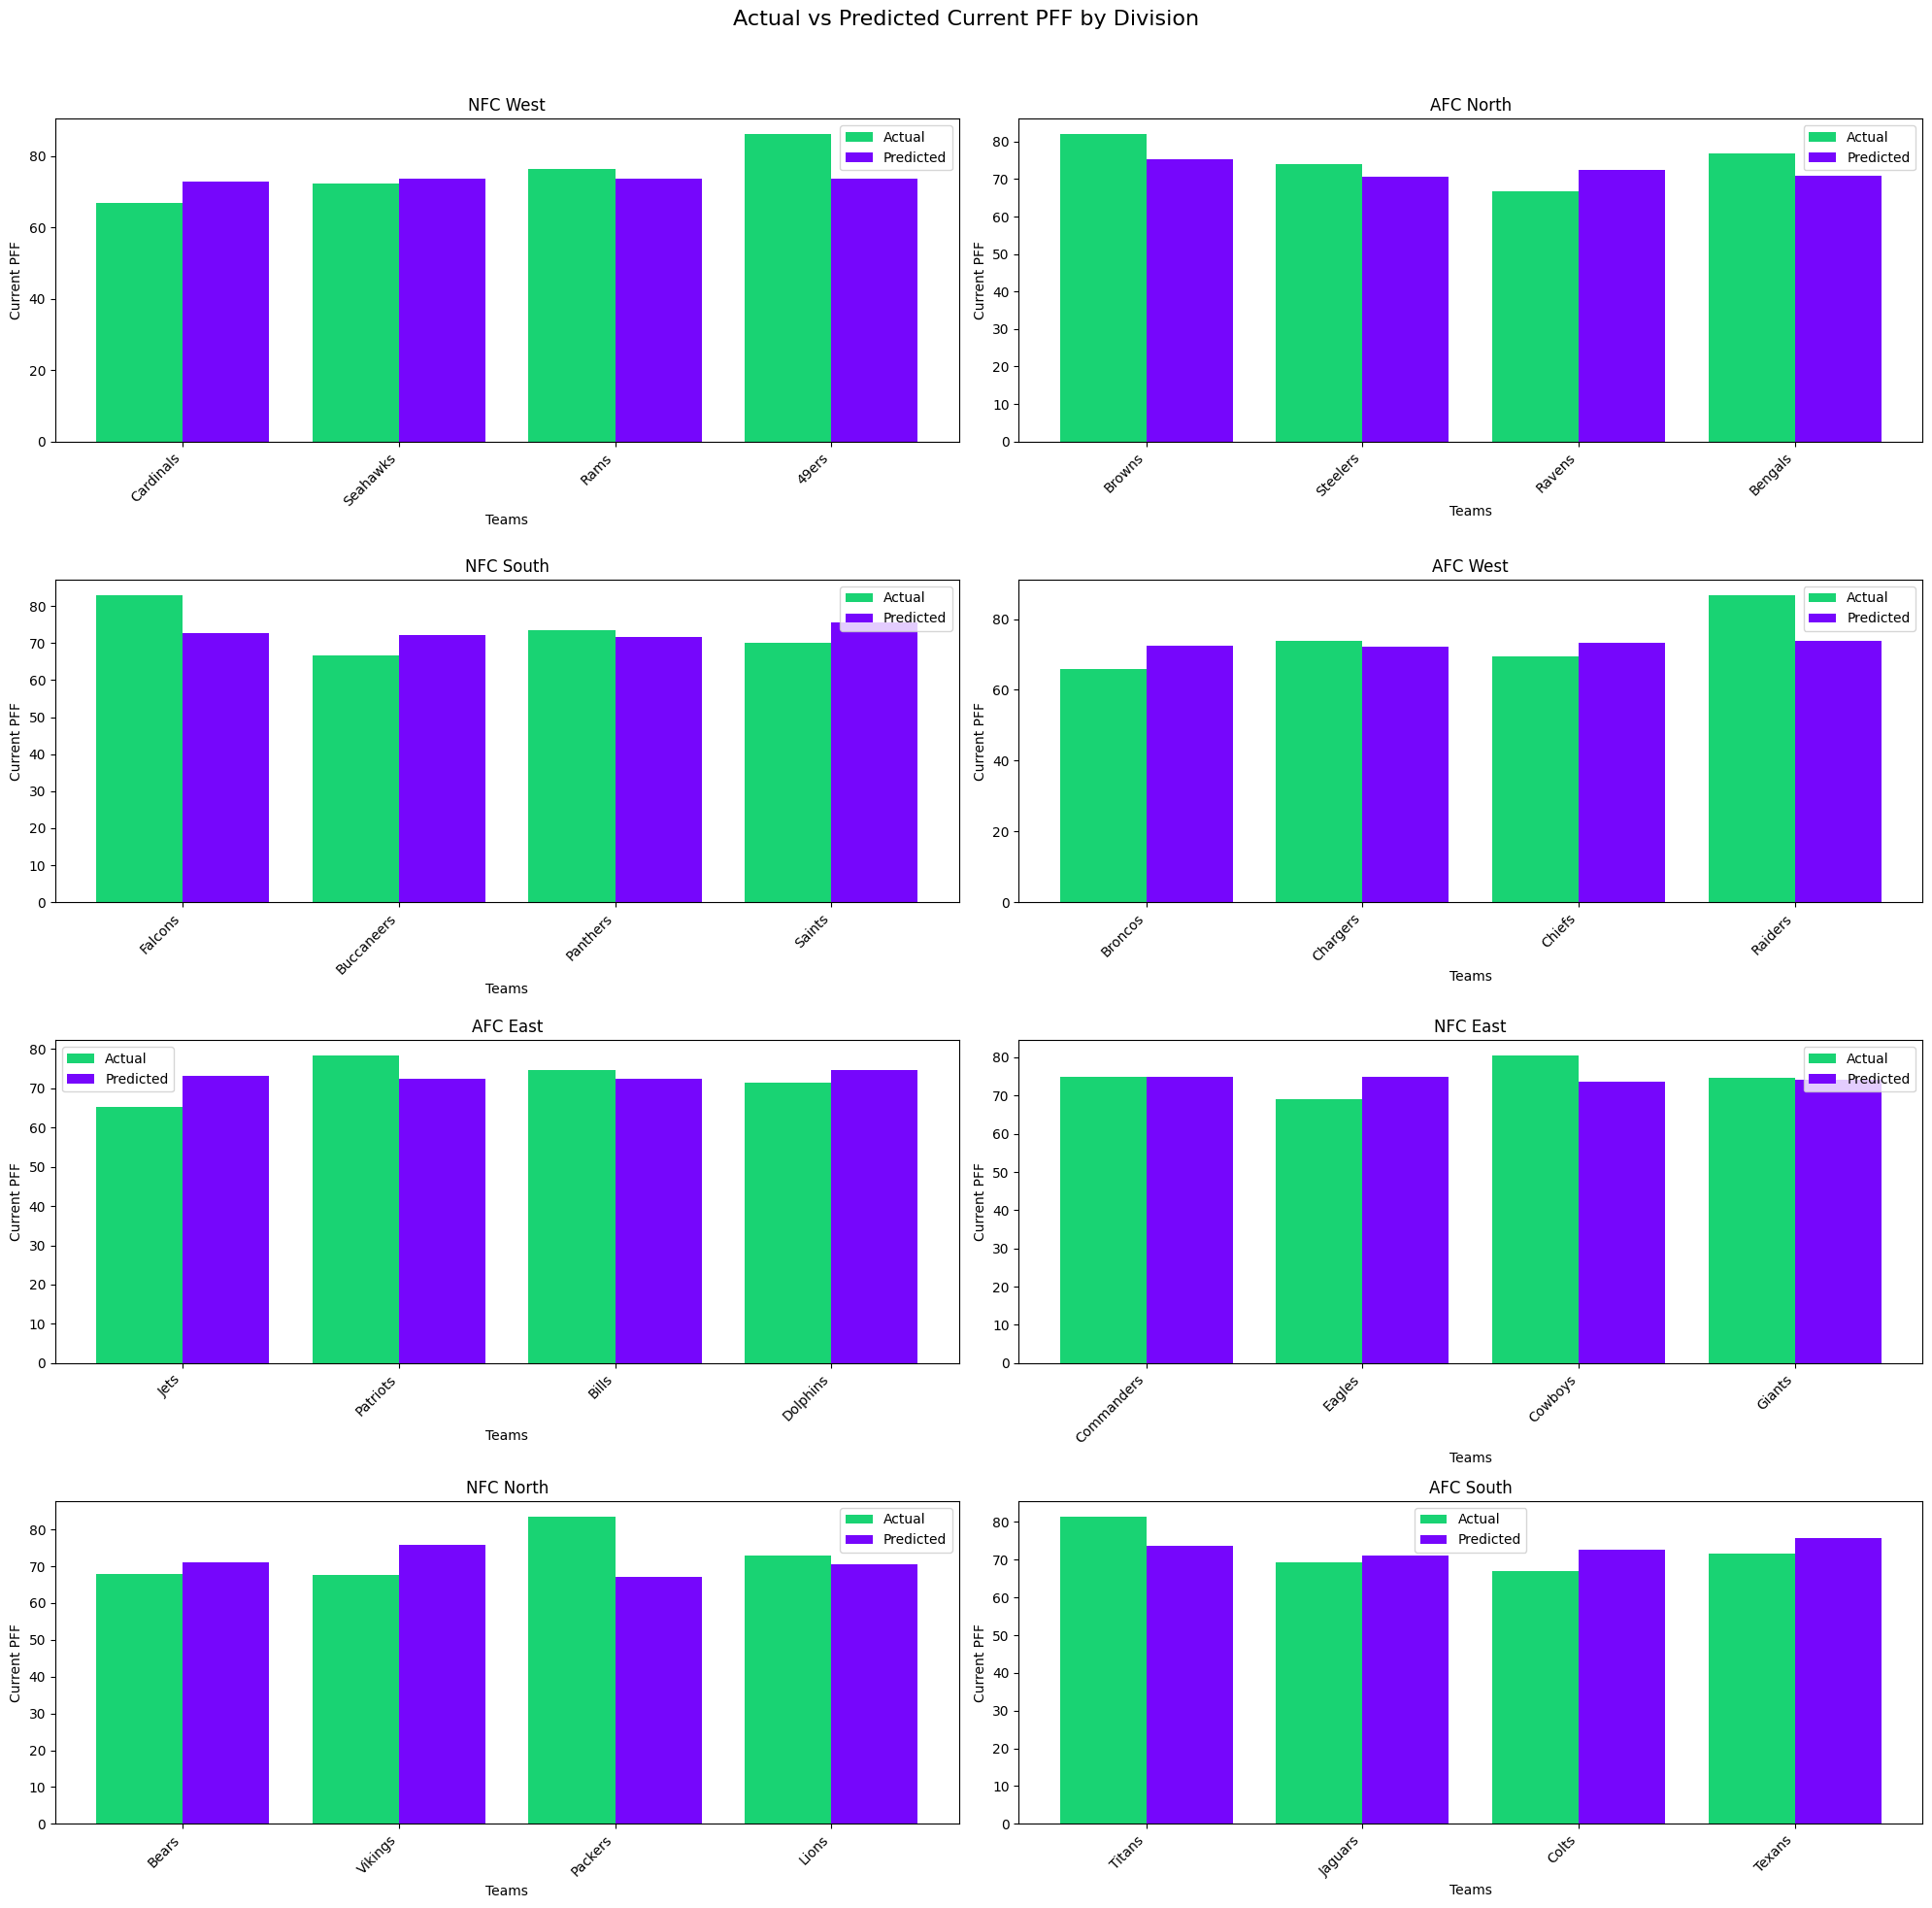

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 77.5974 - val_loss: 25.6485
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.1891 - val_loss: 26.1373
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.7369 - val_loss: 25.4341
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.1799 - val_loss: 27.6946
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.9284 - val_loss: 27.4096
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.9805 - val_loss: 30.3300
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.0553 - val_loss: 28.5576
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.9282 - val_loss: 23.5767
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.5842 - val_loss: 37.4258
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.8391 - val_loss: 30.5048
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.0709 - val_loss: 27.5478
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 144

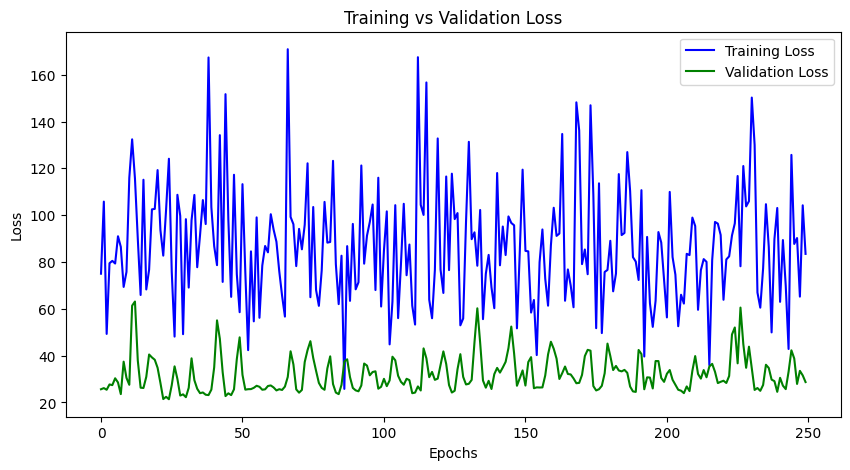

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


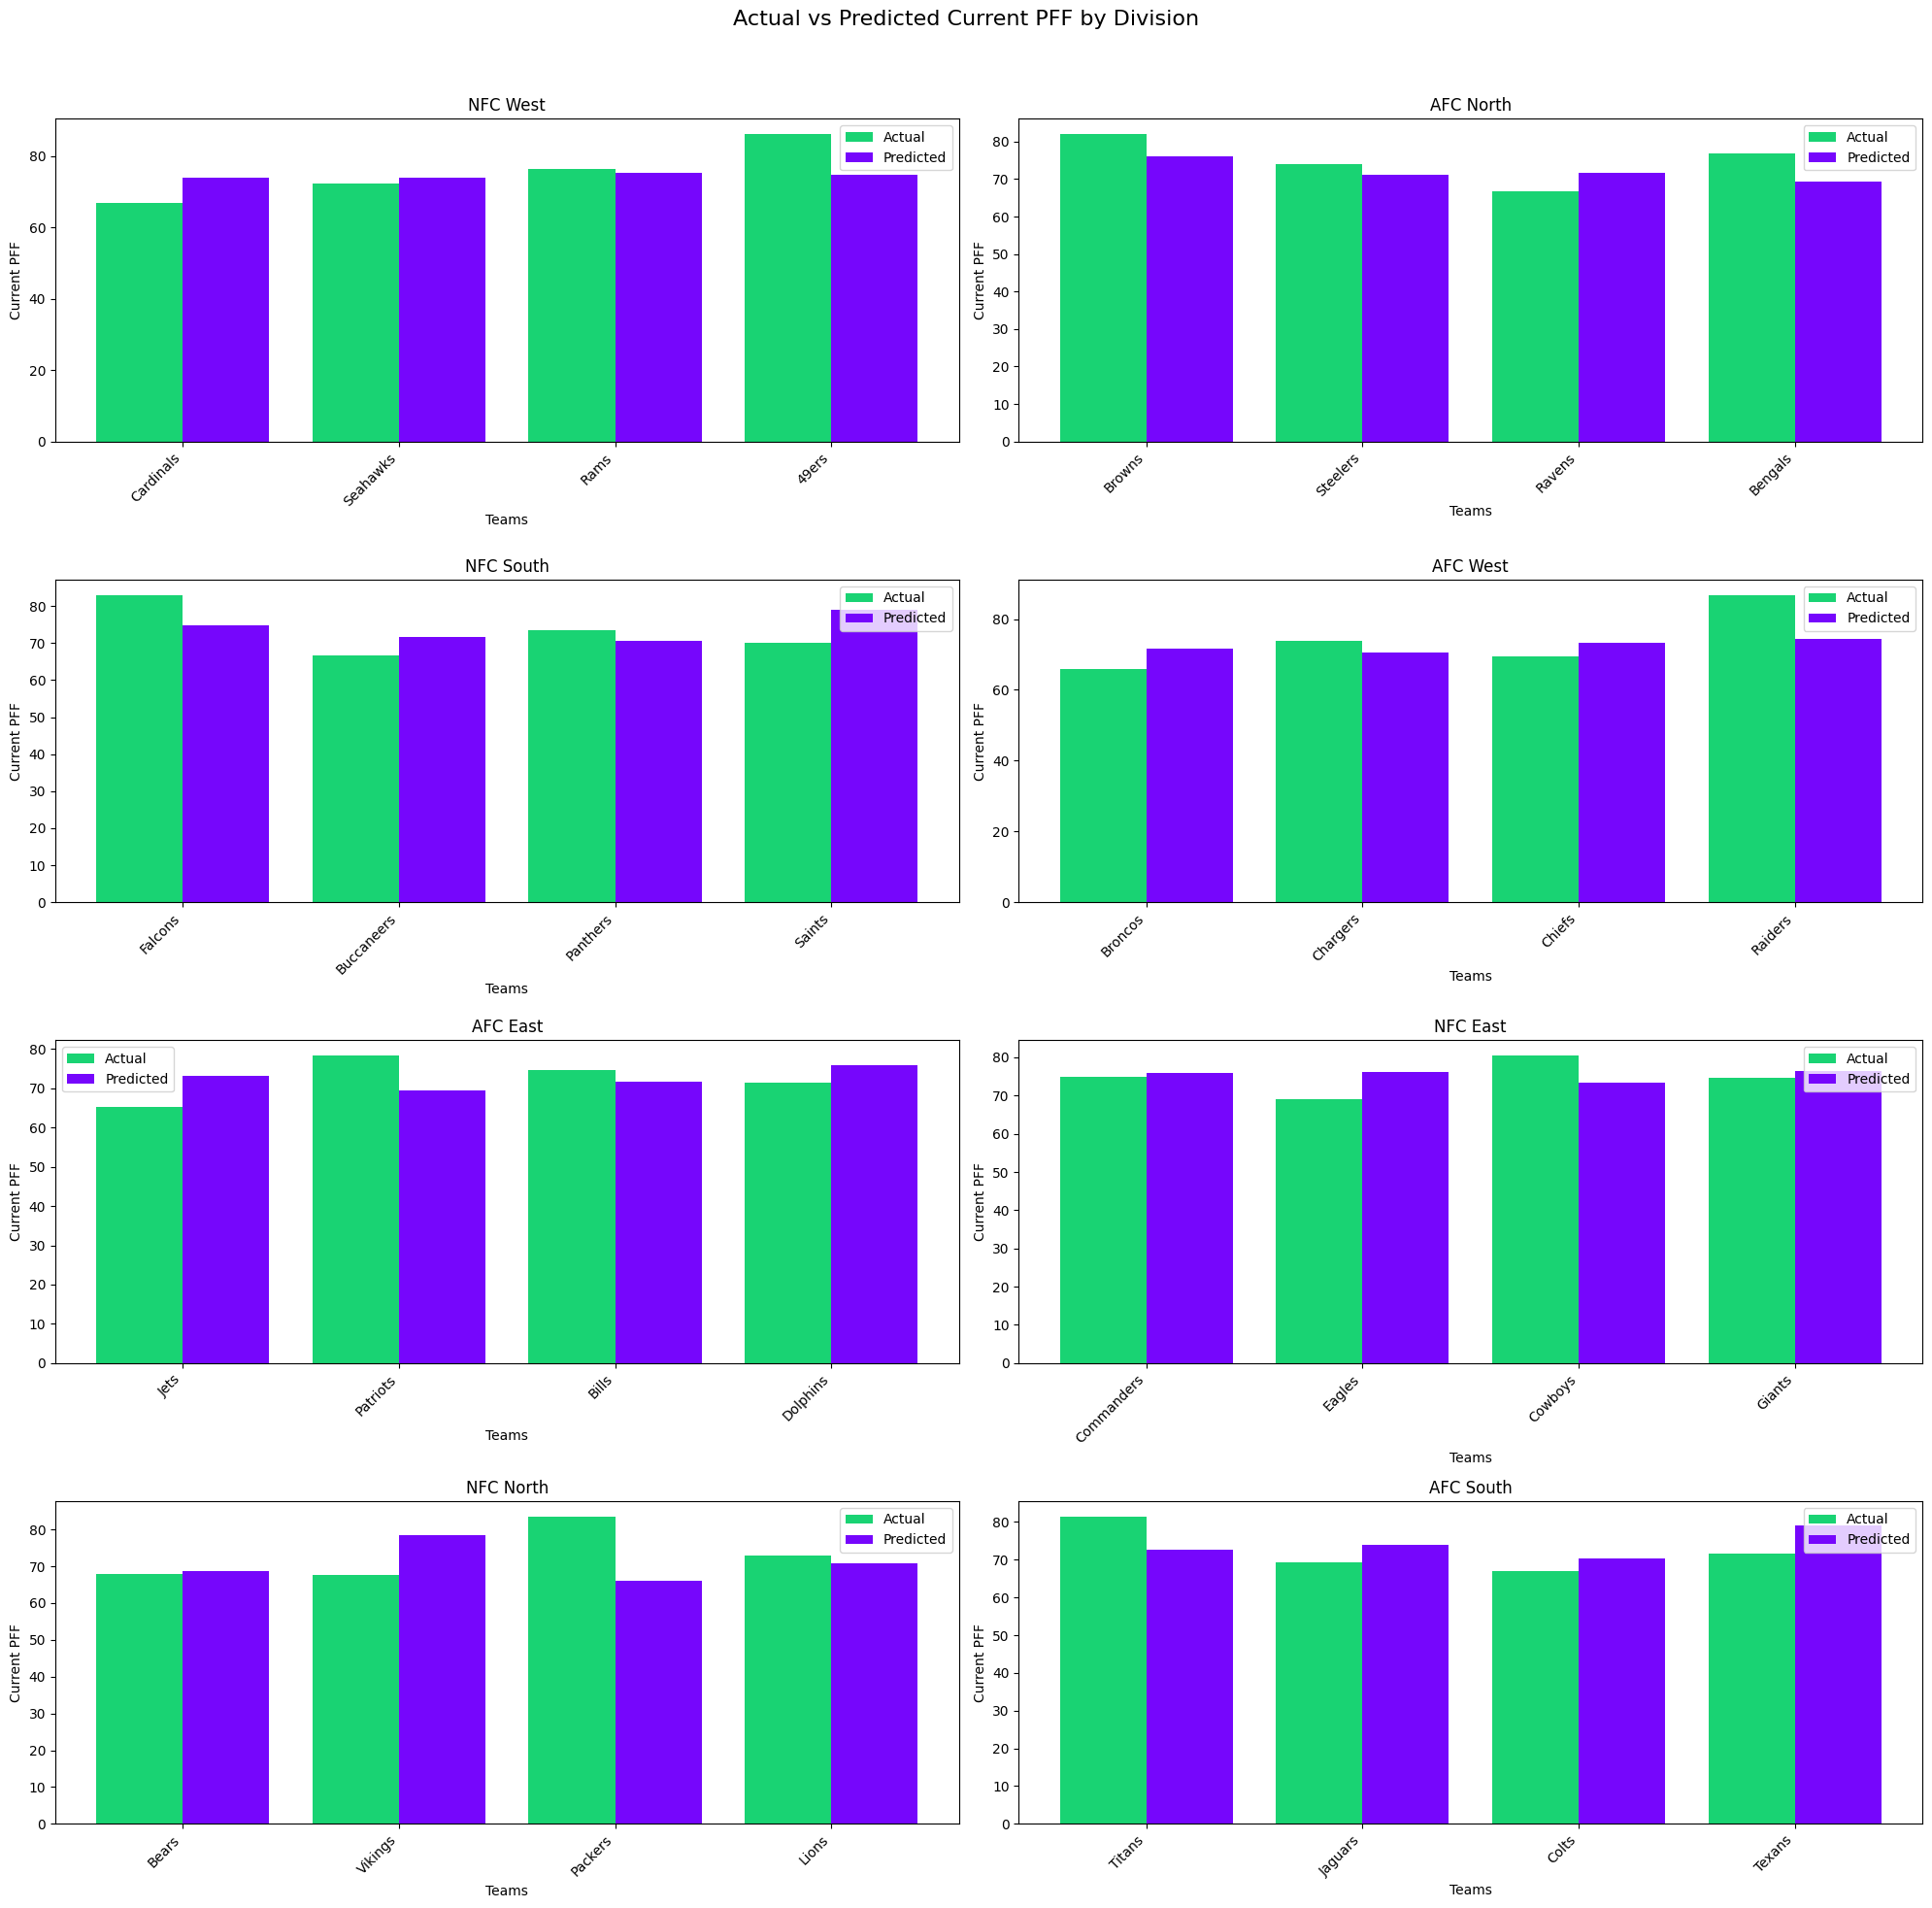

In [35]:
#Training the Model using RNN
epoch_list = [5,10,15,20,25,30,50,100,250]
for e in epoch_list:
    history = model.fit(S, t, epochs=e, batch_size = 9, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    #Making predictions on the test set
    t_pred = model.predict(S)
    from sklearn.metrics import r2_score
    
    #Calculating R² score
    r2 = r2_score(t, t_pred)
    
    data = rb_df[rb_df['Year'] == 2022].copy()
    data['Predicted_PFF'] = t_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF_x', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF_x'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

Training model for 5 epochs...
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 68.3773 - val_loss: 45.9623
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.2132 - val_loss: 36.7825
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.0591 - val_loss: 56.3639
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.1103 - val_loss: 78.6505
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 120.3001 - val_loss: 46.9337


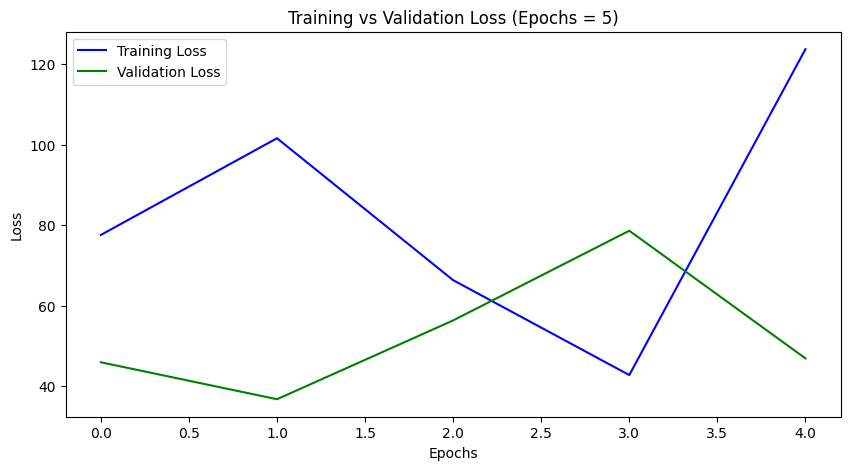

Training model for 10 epochs...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 83.0929 - val_loss: 49.8462
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.9426 - val_loss: 53.7339
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 113.4029 - val_loss: 59.9667
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106.4861 - val_loss: 93.1842
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 107.5386 - val_loss: 49.8977
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59.5174 - val_loss: 31.5458
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.3153 - val_loss: 29.5882
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 62.8821 - val_loss: 49.4026
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 109.4886 - val_loss: 55.2486
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.7573 - val_loss: 33.4708


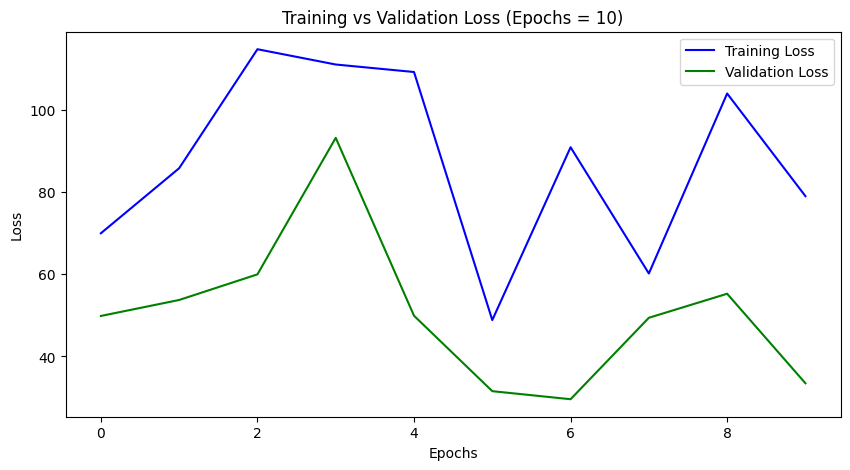

Training model for 15 epochs...
Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.8119 - val_loss: 36.4629
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.6945 - val_loss: 47.3799
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.4733 - val_loss: 37.3710
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.4388 - val_loss: 37.5773
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 75.6168 - val_loss: 45.8715
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.8076 - val_loss: 47.8416
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.1222 - val_loss: 37.8207
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.5220 - val_loss: 38.3798
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.3095 - val_loss: 40.1103
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.5863 - val_loss: 40.9986
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.1454 - val_loss: 41.3940
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4

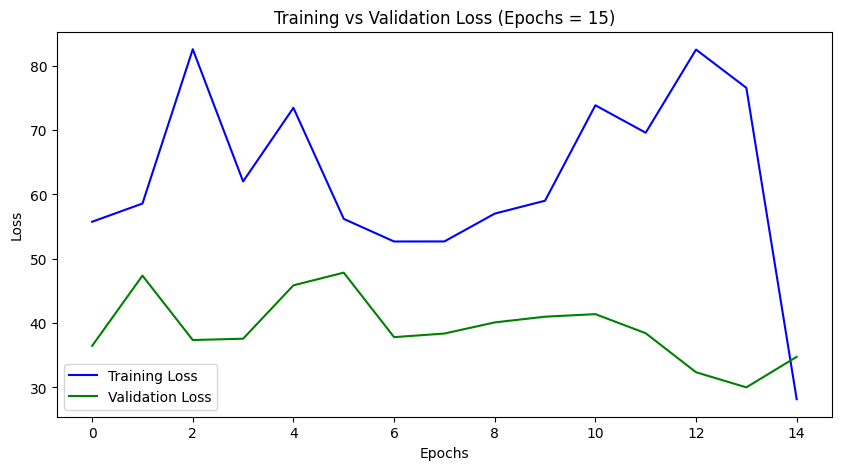

Training model for 20 epochs...
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66.0715 - val_loss: 44.4250
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.4602 - val_loss: 54.2636
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.2374 - val_loss: 46.0190
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.3946 - val_loss: 32.7105
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.7417 - val_loss: 39.7266
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.8208 - val_loss: 43.2217
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.9907 - val_loss: 58.0533
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.7029 - val_loss: 43.9993
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.4059 - val_loss: 42.2613
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.7774 - val_loss: 42.9424
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.5544 - val_loss: 45.6592
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

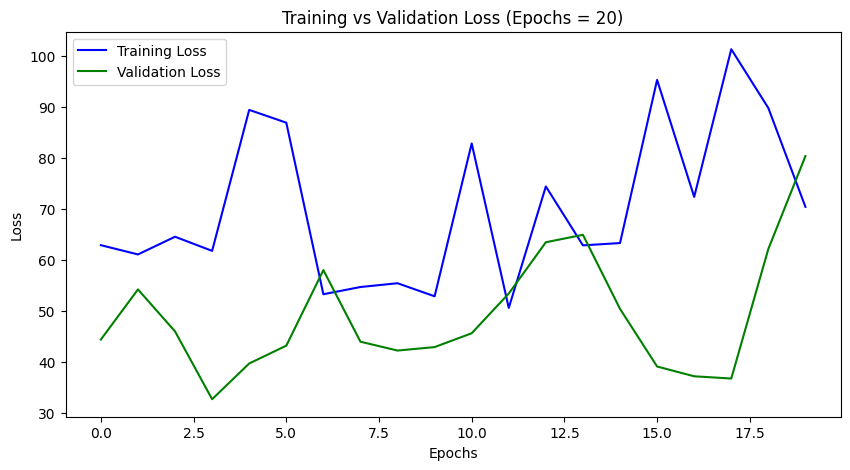

Training model for 25 epochs...
Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32.5702 - val_loss: 64.3131
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.5300 - val_loss: 42.1763
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.3740 - val_loss: 36.6979
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.6089 - val_loss: 40.9156
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.9125 - val_loss: 43.6223
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.2051 - val_loss: 39.5660
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.2913 - val_loss: 33.0772
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.2368 - val_loss: 33.0015
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.7607 - val_loss: 35.9547
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.7191 - val_loss: 53.3919
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.0402 - val_loss: 60.8420
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5

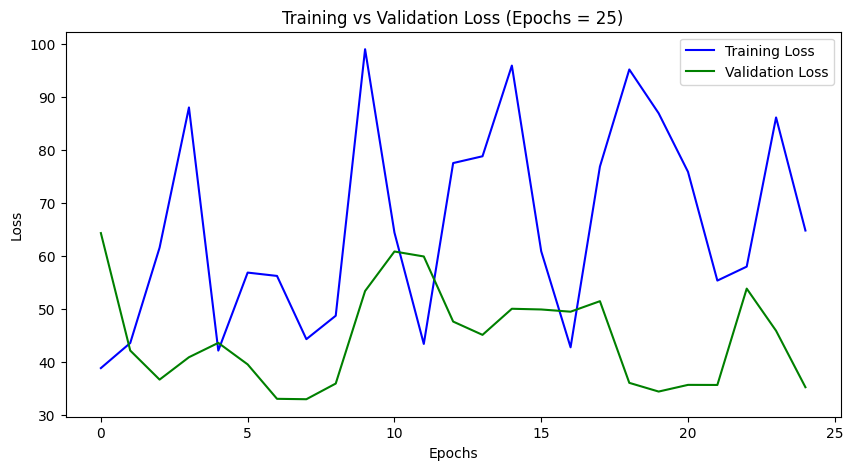

Training model for 30 epochs...
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.0539 - val_loss: 35.9628
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.4316 - val_loss: 41.5839
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.9477 - val_loss: 59.4967
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.1036 - val_loss: 50.9067
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.3553 - val_loss: 41.4756
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68.8816 - val_loss: 40.2908
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.5791 - val_loss: 35.6934
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.3403 - val_loss: 32.9049
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.9749 - val_loss: 34.7646
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.5631 - val_loss: 31.6981
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.9704 - val_loss: 30.5678
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4

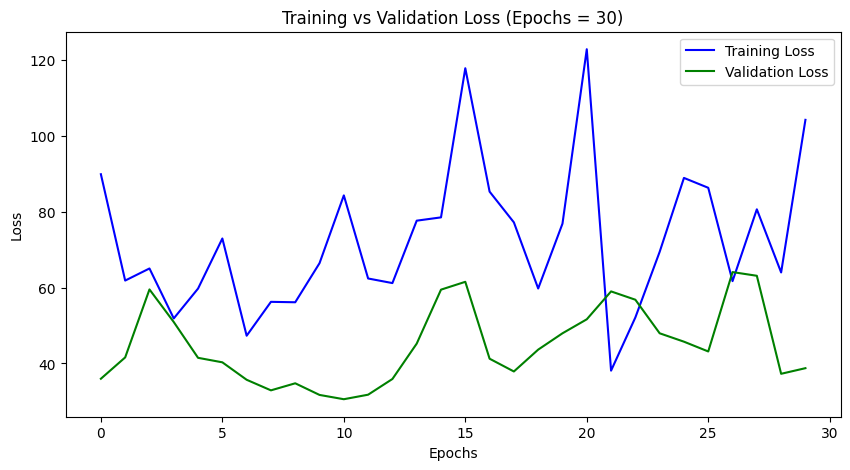

Training model for 50 epochs...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 72.5236 - val_loss: 36.5369
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 81.3221 - val_loss: 38.8647
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.3519 - val_loss: 50.7862
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.8176 - val_loss: 55.0112
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.9105 - val_loss: 51.0314
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.9055 - val_loss: 41.7495
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.1215 - val_loss: 40.9715
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.5591 - val_loss: 46.2409
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.0436 - val_loss: 41.0387
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103.8628 - val_loss: 41.0531
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.9244 - val_loss: 47.8788
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

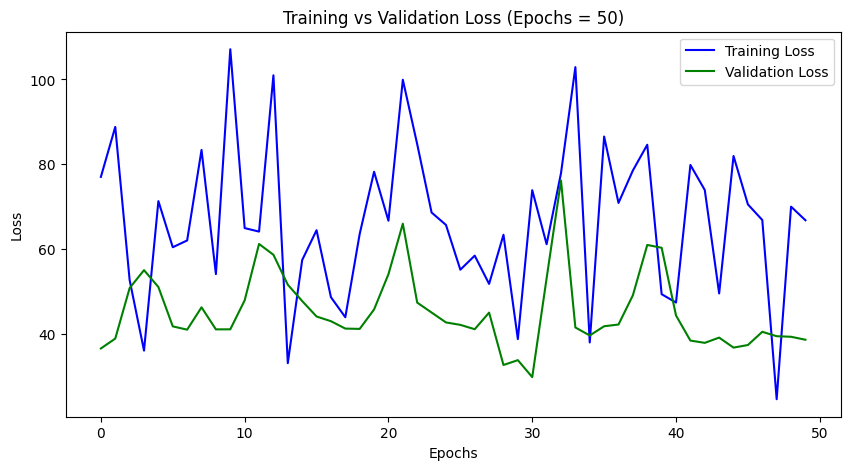

Training model for 100 epochs...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 93.5523 - val_loss: 48.5303
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.2881 - val_loss: 73.3420
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 80.3668 - val_loss: 62.8752
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39.6202 - val_loss: 44.9403
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.7718 - val_loss: 38.6797
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 54.7695 - val_loss: 37.5159
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.8577 - val_loss: 44.0833
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.9477 - val_loss: 71.3828
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.4841 - val_loss: 80.2523
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.0718 - val_loss: 51.6095
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.7822 - val_loss: 41.0706
Epoch 12/100
3/3 ━━━━━━━━━

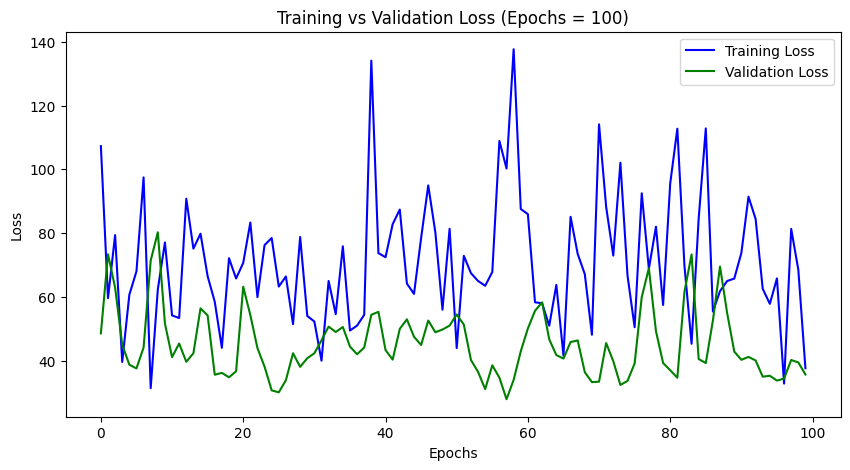

Training model for 250 epochs...
Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 39.7967 - val_loss: 34.2617
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.4332 - val_loss: 33.3115
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.1329 - val_loss: 42.8910
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.4225 - val_loss: 53.6812
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.2787 - val_loss: 37.8303
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.9110 - val_loss: 35.7120
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.7568 - val_loss: 38.7116
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.4721 - val_loss: 49.0700
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.0577 - val_loss: 60.5119
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85.5354 - val_loss: 50.5836
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.0403 - val_loss: 40.1778
Epoch 12/250
3/3 ━━━━━━━━━━━━

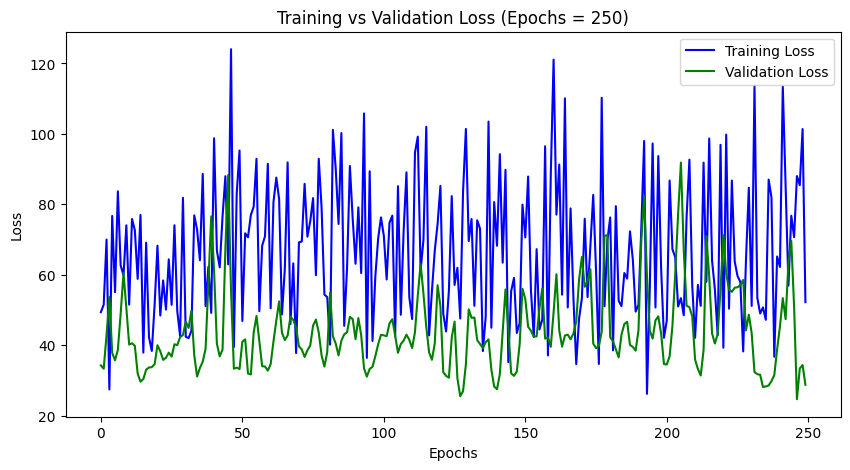

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R² Score: 0.4931


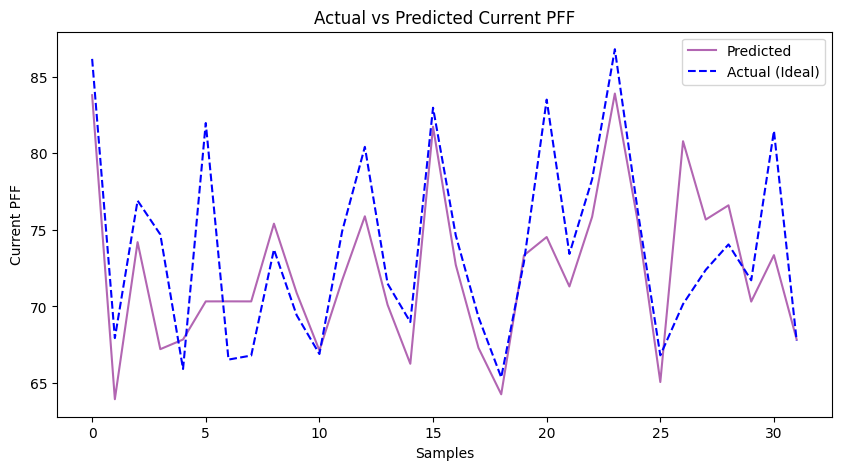

FileNotFoundError: [Errno 2] No such file or directory: 'football_icon.png'

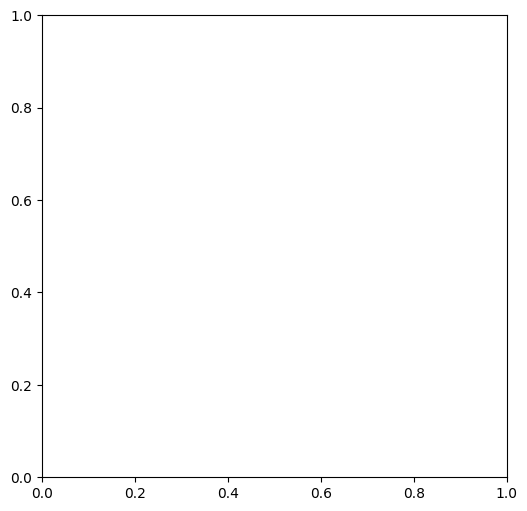

In [37]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.metrics import r2_score

# Training the model using RNN
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]

for e in epoch_list:
    print(f"Training model for {e} epochs...")
    history = model.fit(S, t, epochs=e, batch_size=9, validation_split=0.2, verbose=1)
    
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
    plt.title(f'Training vs Validation Loss (Epochs = {e})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Making predictions on the test set
t_pred = model.predict(S)

# Calculating R² score
r2 = r2_score(t, t_pred)

# Print R² score
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(t_pred, label='Predicted', color='purple', alpha=0.6)
plt.plot(t, label='Actual (Ideal)', color='blue', linestyle='dashed')
plt.title('Actual vs Predicted Current PFF')
plt.xlabel('Samples')
plt.ylabel('Current PFF')
plt.legend()
plt.show()

# Adding football icons on a sample plot
def getImage(path):
    """Utility to load an image for annotations."""
    return OffsetImage(plt.imread(path), zoom=0.05)

# Example coordinates for annotations
x_coords = [8.2, 4.5, 3.3, 6.9]
y_coords = [5.4, 3.5, 4.7, 7.1]

fig, ax = plt.subplots(figsize=(6, 6))
for x0, y0 in zip(x_coords, y_coords):
    ab = AnnotationBbox(getImage('football_icon.png'), (x0, y0), frameon=False)
    ax.add_artist(ab)

ax.set_xticks(range(10))
ax.set_yticks(range(10))
plt.title("Annotated Plot with Football Icons")
plt.grid(True)
plt.show()
